# **House Sale Price Analysis**

**Introduction**

This notebook explores all the features in determining Sale Price of a house.
The dataset consists of all the features that help in predicting the sale price of a house.

# **Import Libraries**

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.express as px

# **Import Dataset**

In [243]:
filename = open(r"D:\RATHNA\FITA ACADEMY\Practice\train.csv")

In [244]:
df=pd.read_csv(filename)

# **Dataset Info**

In [246]:
#First 5 rows of our dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [247]:
#Number of rows and columns
df.shape

(1460, 81)

**Our dataset consists of 1460 rows and 81 columns**

In [249]:
#Columns in our dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [250]:
#Description of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [251]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Our dataset features consists of three datatypes float integer object Of which total numerical features are 38 And categorical features are 43

In [253]:
#We'll be applying the same changes to df .

features_to_change = ['MSSubClass','OverallQual','OverallCond','YearBuilt', 'YearRemodAdd',
                     'MoSold', 'YrSold','GarageCars']

int_to_object = ['MSSubClass','OverallQual','OverallCond','GarageCars']

for feature in int_to_object:
    df[feature] = df[feature].astype(object)

In [254]:
#Drop Id column as it is not required

df.drop(columns=['Id'],axis=1,inplace=True)

# **Null Values**

In [256]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [257]:
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

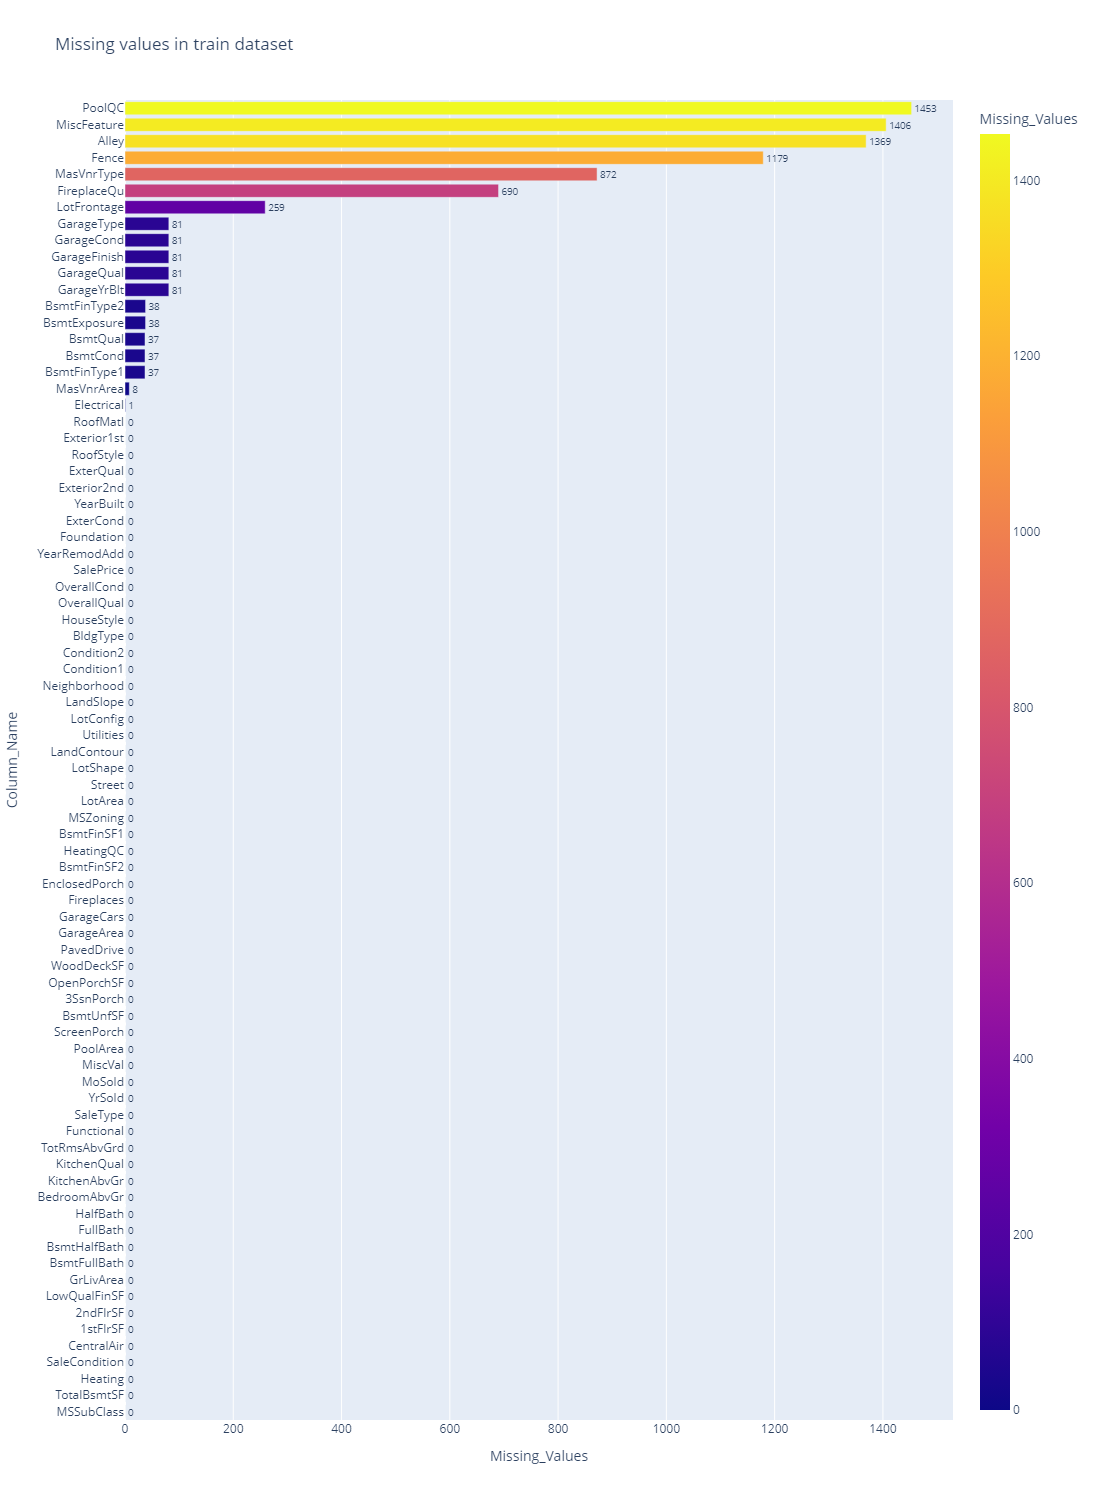

In [258]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [259]:
#The following columns have missing values

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,MasVnrType,872
5,FireplaceQu,690
6,LotFrontage,259
7,GarageType,81
8,GarageYrBlt,81
9,GarageFinish,81


Out of the 18 columns with missing values,
Three are numerical features LotFrontage,MasVnrArea and GarageYrBlt
And the rest are categorical features.


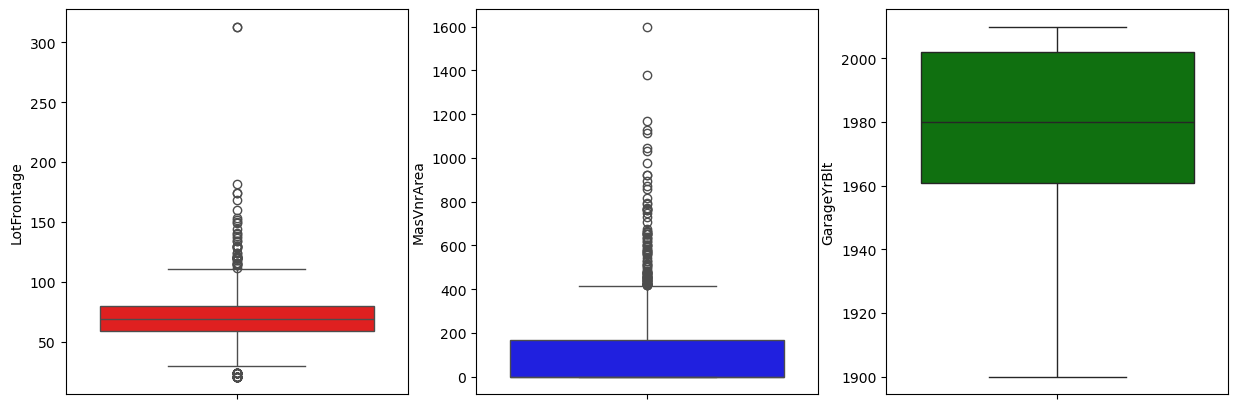

In [261]:

plt.figure(figsize=(15,5))
features_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = df[features_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

In [262]:
df['LotFrontage'].mean(),df['LotFrontage'].median()


(70.04995836802665, 69.0)

In [263]:
df['MasVnrArea'].mean(),df['MasVnrArea'].median()


(103.68526170798899, 0.0)

In [264]:
df['GarageYrBlt'].mean(),df['GarageYrBlt'].median()

(1978.5061638868744, 1980.0)

In [265]:
features_to_examine

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [266]:
for col in features_to_examine:
    df[col].fillna(df[col].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15468\3338939789.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [267]:
#We can see that there are no missing values present now

df[features_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

**let's examine categorical features**

In [269]:
features_to_examine = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
 'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [270]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [271]:
df["PoolQC"] = df["PoolQC"].fillna('None')

In [272]:
df['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [273]:
df["MiscFeature"] = df["MiscFeature"].fillna('None')

In [274]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [275]:
df["Alley"] = df["Alley"].fillna('None')

In [276]:
df['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [277]:
df["Fence"] =df["Fence"].fillna('None')

In [278]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [279]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NotAvailable')

In [280]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [281]:
df['MasVnrType'].mode()


0    BrkFace
Name: MasVnrType, dtype: object

In [282]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [283]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


In [284]:
df['Electrical'].isna().sum()


1

In [285]:
df['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [286]:
df[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [287]:
df[['GarageType','GarageFinish',
 'GarageQual','GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


In [288]:

df['MasVnrType'].fillna('None',inplace=True)
fill_with_No_Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
fill_with_No_Grg = ['GarageType','GarageFinish','GarageQual','GarageCond']

for col in fill_with_No_Bsmt:
    df[col].fillna('No_Bsmt',inplace=True)
for col in fill_with_No_Grg:
    df[col].fillna('No_Grg',inplace=True)
    df['Electrical'].fillna('SBrkr',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15468\4067481062.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\User\AppData\Local\Temp\ipykernel_15468\4067481062.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [289]:
#Let's check if there any missing values left in train dataset first

df.isna().sum().sum()


0

**Target Feature**

In [291]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Our target feature is a continuous variable with values ranging from 34900 to 755000.
The average sale price of all the houses in our dataset is 180921.

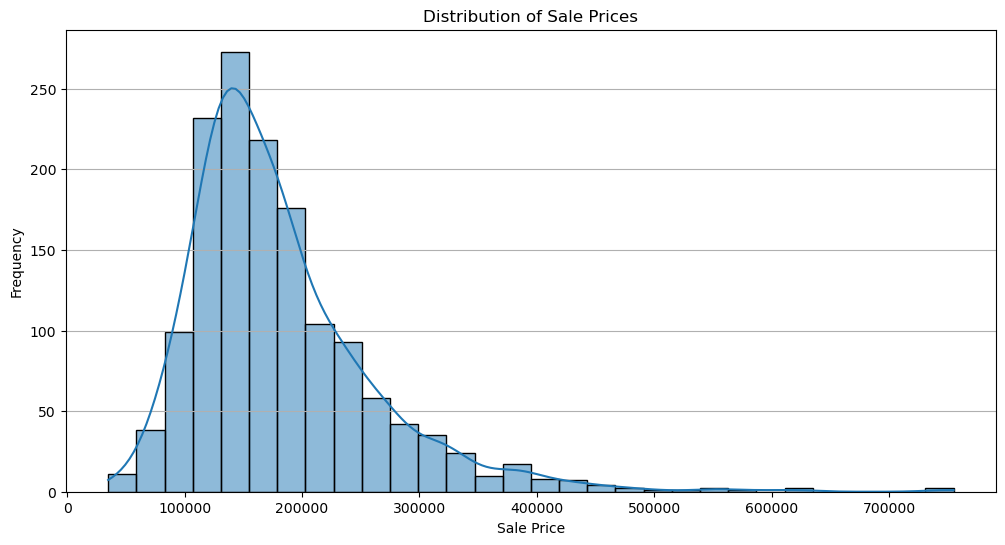

In [293]:
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)  # Add `kde=True` for a smooth curve
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Sale Price has a right skewed distribution.
The median sale price of our dataset is 163000 which is less than the average value i.e because of right skewed distribution.
We can see some of the houses have sale price more than 4,00,000.

**Sale Price with Other Features**

We take numerical and categorical features and analyze the highly correlated features with our target feature.

**Numerical Analysis**

There are two types of numerical features
Discrete and Continuous

 **Discrete features**

In [300]:
discrete=[]
for col in df.columns:
    if df[col].dtype=='int64' and len(df[col].unique()) <=15:
        discrete.append(col)

**Discrete Numerical Analysis**

In [302]:
print("Discrete Features :: \n\n{}".format(discrete))

Discrete Features :: 

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold']


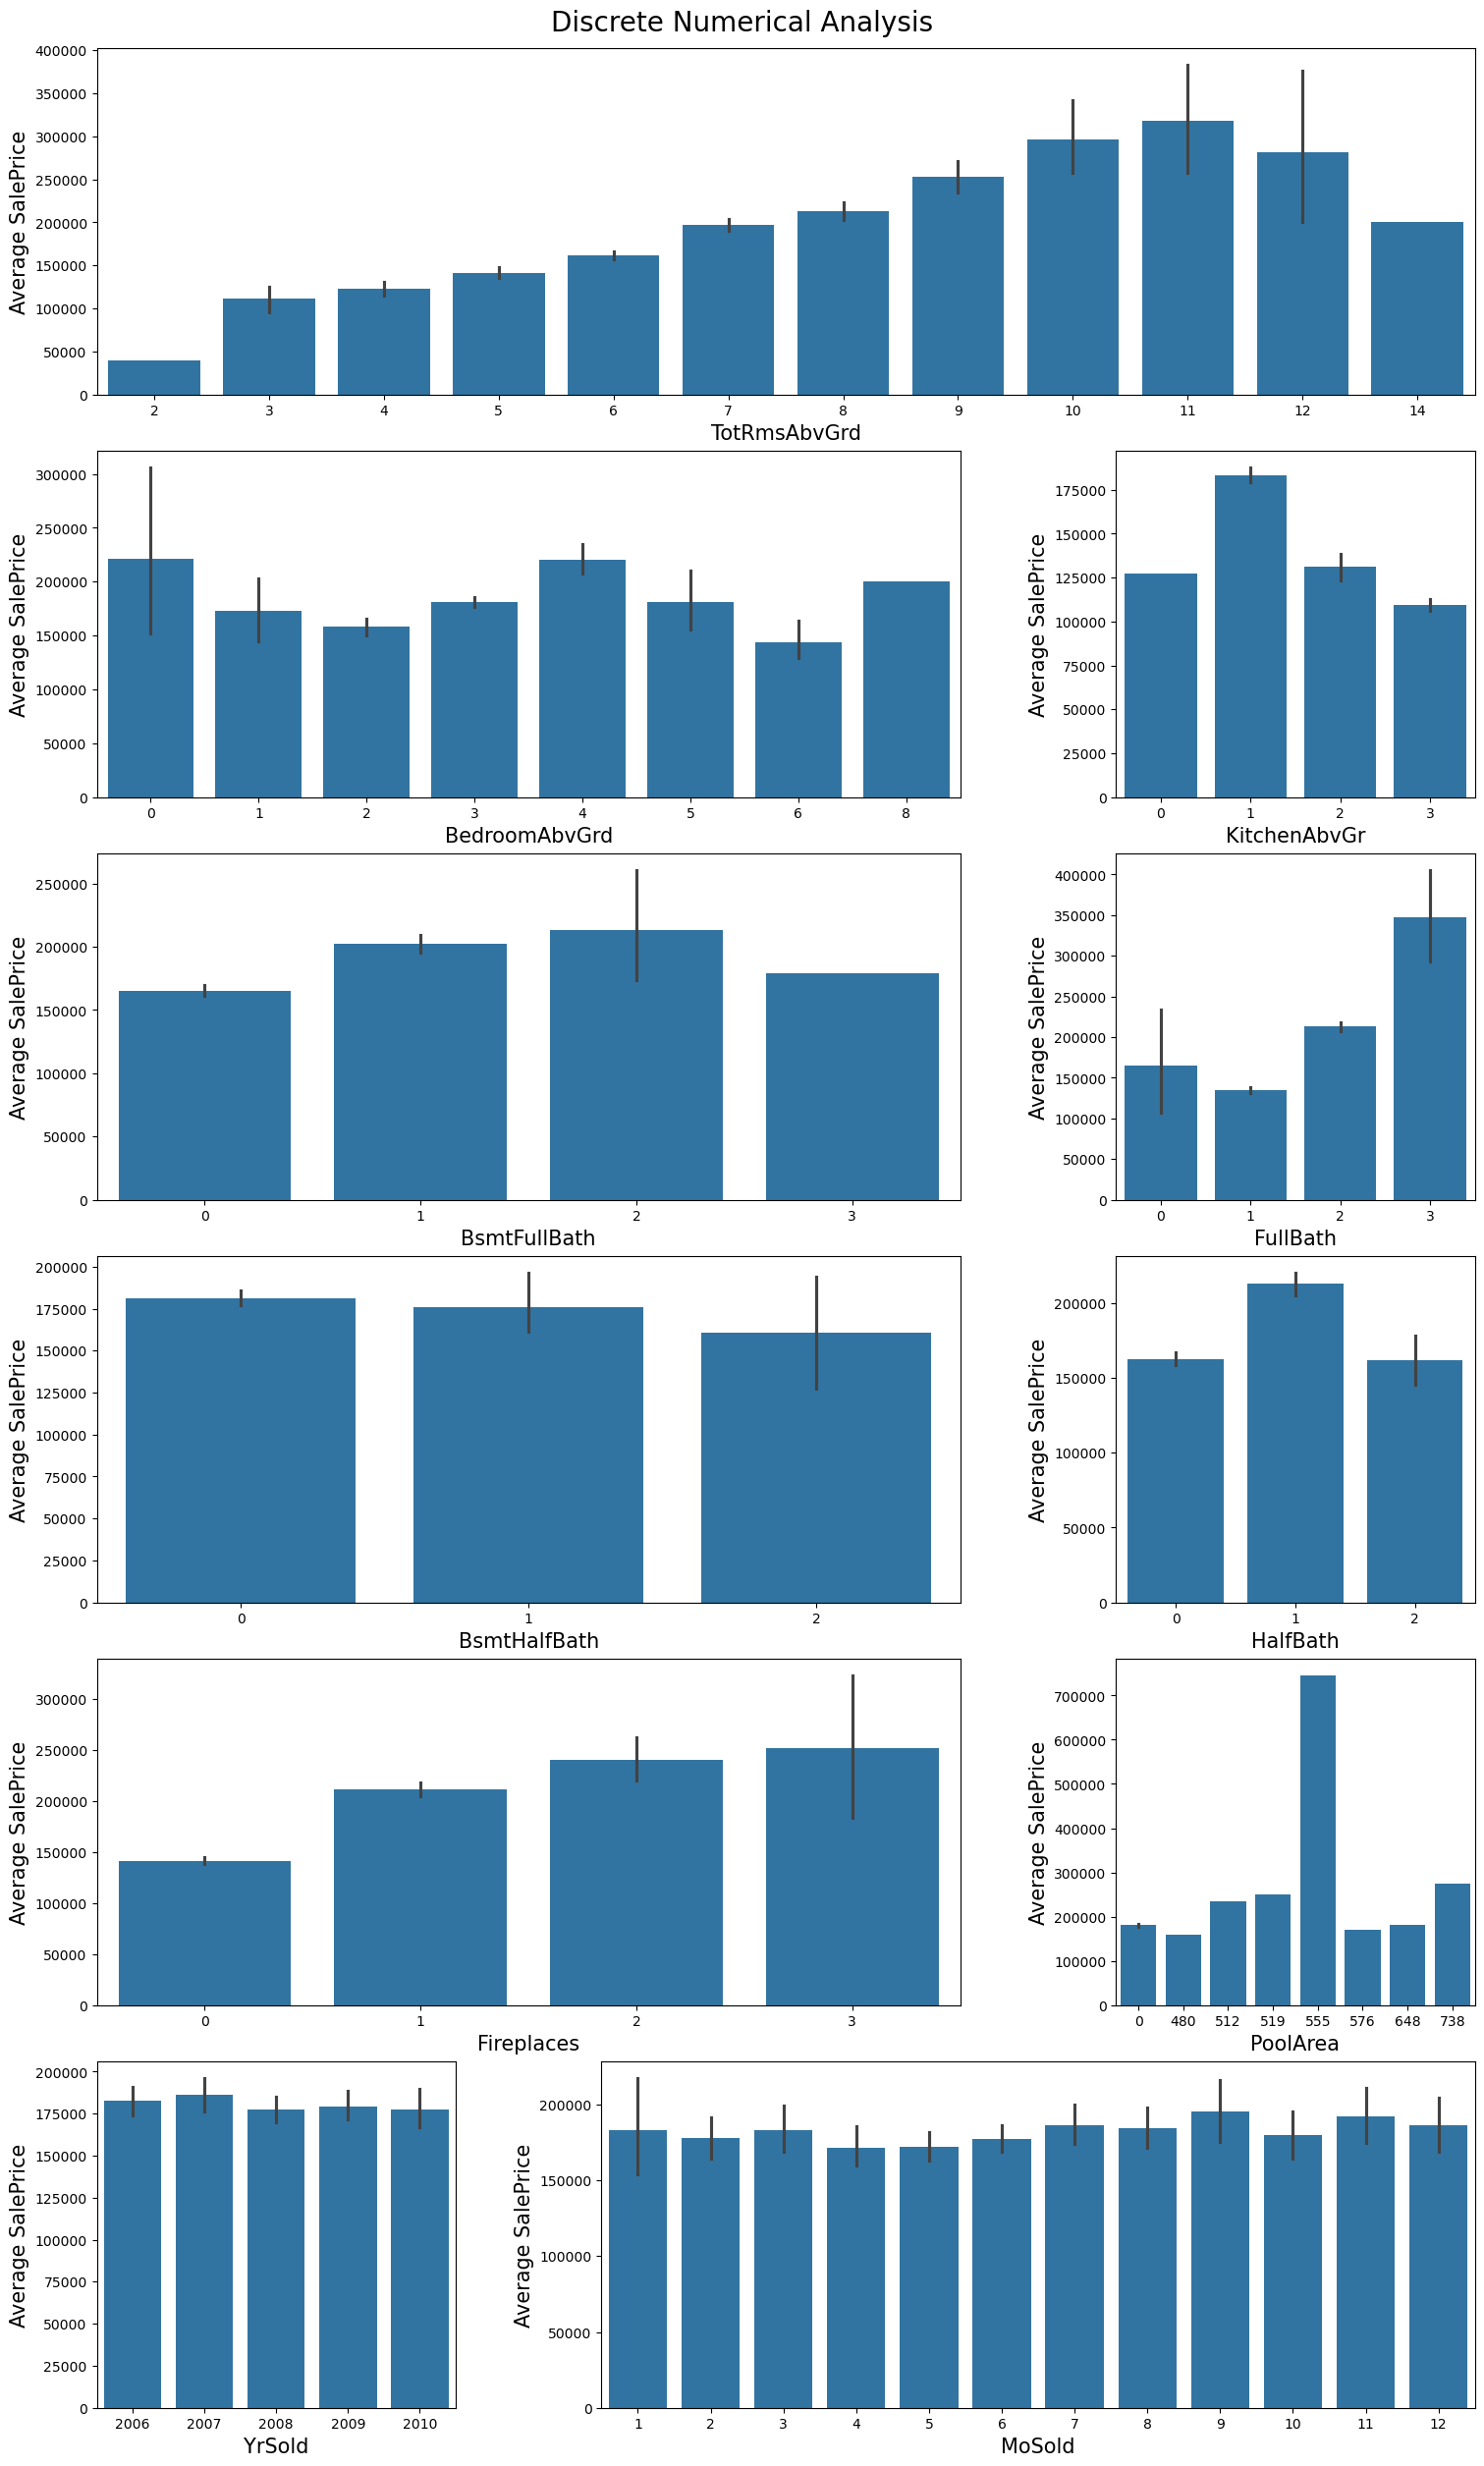

In [303]:
from matplotlib.gridspec import GridSpec 
# Set up the figure and GridSpec layout
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = GridSpec(6, 3, figure=fig)

# Plotting each subplot
plt.subplot(gs[0, :])
sns.barplot(data=df, x="TotRmsAbvGrd", y="SalePrice")
plt.xlabel("TotRmsAbvGrd", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[1, :-1])
sns.barplot(data=df, x="BedroomAbvGr", y="SalePrice")
plt.xlabel("BedroomAbvGrd", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[1, -1])
sns.barplot(data=df, x="KitchenAbvGr", y="SalePrice")
plt.xlabel("KitchenAbvGr", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[2, :-1])
sns.barplot(data=df, x="BsmtFullBath", y="SalePrice")
plt.xlabel("BsmtFullBath", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[2, -1])
sns.barplot(data=df, x="FullBath", y="SalePrice")
plt.xlabel("FullBath", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[3, :-1])
sns.barplot(data=df, x="BsmtHalfBath", y="SalePrice")
plt.xlabel("BsmtHalfBath", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[3, -1])
sns.barplot(data=df, x="HalfBath", y="SalePrice")
plt.xlabel("HalfBath", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[4, :-1])
sns.barplot(data=df, x="Fireplaces", y="SalePrice")
plt.xlabel("Fireplaces", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[4, -1])
sns.barplot(data=df, x="PoolArea", y="SalePrice")
plt.xlabel("PoolArea", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[5, :-2])
sns.barplot(data=df, x="YrSold", y="SalePrice")
plt.xlabel("YrSold", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

plt.subplot(gs[5, -2:])
sns.barplot(data=df, x="MoSold", y="SalePrice")
plt.xlabel("MoSold", fontsize=15)
plt.ylabel("Average SalePrice", fontsize=15)

# Set the super title for the entire figure
plt.suptitle("Discrete Numerical Analysis", fontsize=20)

# Show the plot
plt.show()


**Continuous numerical features**

In [305]:
num = []

for col in df.columns:
    if df[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [306]:
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


We'll have a look at the correlation between all the features with the help of Heatmap.
Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature that we are trying to predict here .i.e Sale Price.
As there are a lot of features , we'll take 10 features at a time for better visual analysis.

In [308]:
df_corr = df[num].iloc[:,0:10]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

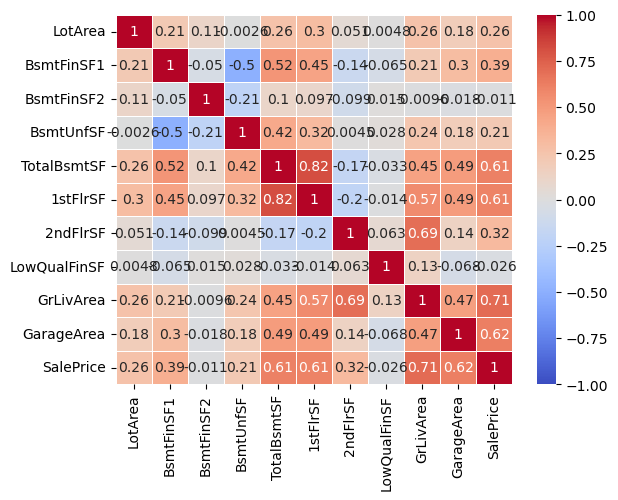

In [309]:
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with Sale Price.
We can see two features have negative correlation with SalePrice.
BsmtFinSF2 [-0.011]
LowQualFinSF [-0.026]

# **Categorical Analysis**

We will focus now on categorical variables in our dataset.

As there are many categorical variables ,they will be grouped into categories

And each feature will be explored with respect to Sale Price (target feature)

In [313]:
cat=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)
        
#printing the list
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Category 1 :: Type of dwellings**

In [315]:
cat1 = ['MSSubClass']

In [316]:

df_new = df.copy()

df_new['MSSubClass'] = df_new['MSSubClass'].replace({20:'1_STORY_NEWER',
                                                    30:'1_STORY_OLDER',40:'1_STORY_ATTIC',
                                                    45:'1_1/2_UNFINISHED',
                                                    50:'1_1/2_FINISHED',60:'2_STORY_NEWER',
                                                    70:'2_STORY_OLDER',75:'2_1/2_STOPY',
                                                    80:'SPLIT/MULTILEVEL',85:'SPLIT_FOYER',
                                                    90:'DUPLEX',120:'1_STORY_PUD',
                                                    150:'1_1/2_STORY_PUD',
                                                    160:'2_STORY_PUD',
                                                    180:'PUD_MULTILEVEL',
                                                    190:'2_FAMILY_CONVERSION'})

#Covert to object
df_new['MSSubClass'] = df_new['MSSubClass'].astype(object)

C:\Users\User\AppData\Local\Temp\ipykernel_15468\3056988794.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_15468\3056988794.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



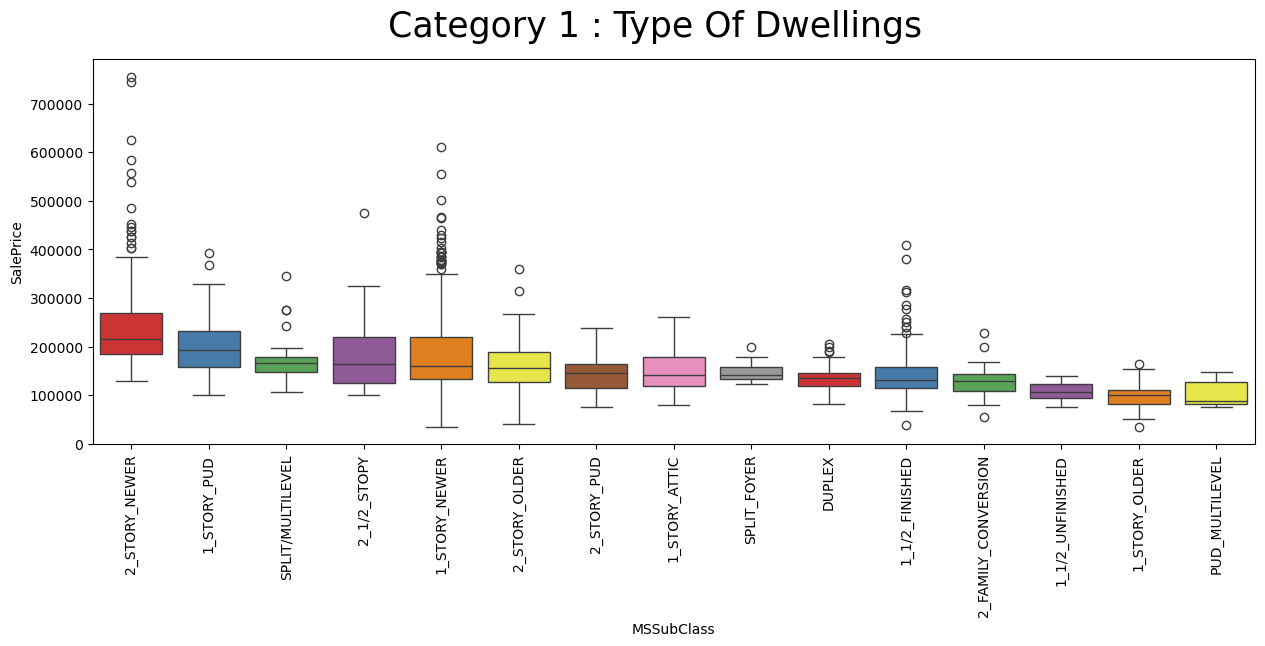

In [317]:
fig=plt.figure(figsize=(15,5))

table = df_new.groupby(['MSSubClass'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
ax = sns.boxplot(data=df_new,x="MSSubClass",y="SalePrice",order=table['MSSubClass'].to_list(),
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
fig.suptitle("Category 1 : Type Of Dwellings",fontsize=25);

The boxplots of all the features are plotted in descending order with respect to their median Sale price.
In MSSubClass , The Newer 2-STORY and 1-Story PUDs have on average higher sale price than the others.

**Category 2 :: Structure of Land and Property**

In [320]:
cat2=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']

MSZoning: Identifies the general zoning classification of the sale.
Zoning allows local governments to regulate which areas under their jurisdiction may have real estate or land used for particular purposes
Street: Type of road access to property
LotShape: General shape of property
LandContour: Flatness of the property
LotConfig: Lot configuration
LandSlope: Slope of property

C:\Users\User\AppData\Local\Temp\ipykernel_15468\3244633920.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\3244633920.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\3244633920.py:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_15468\3244633920.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14

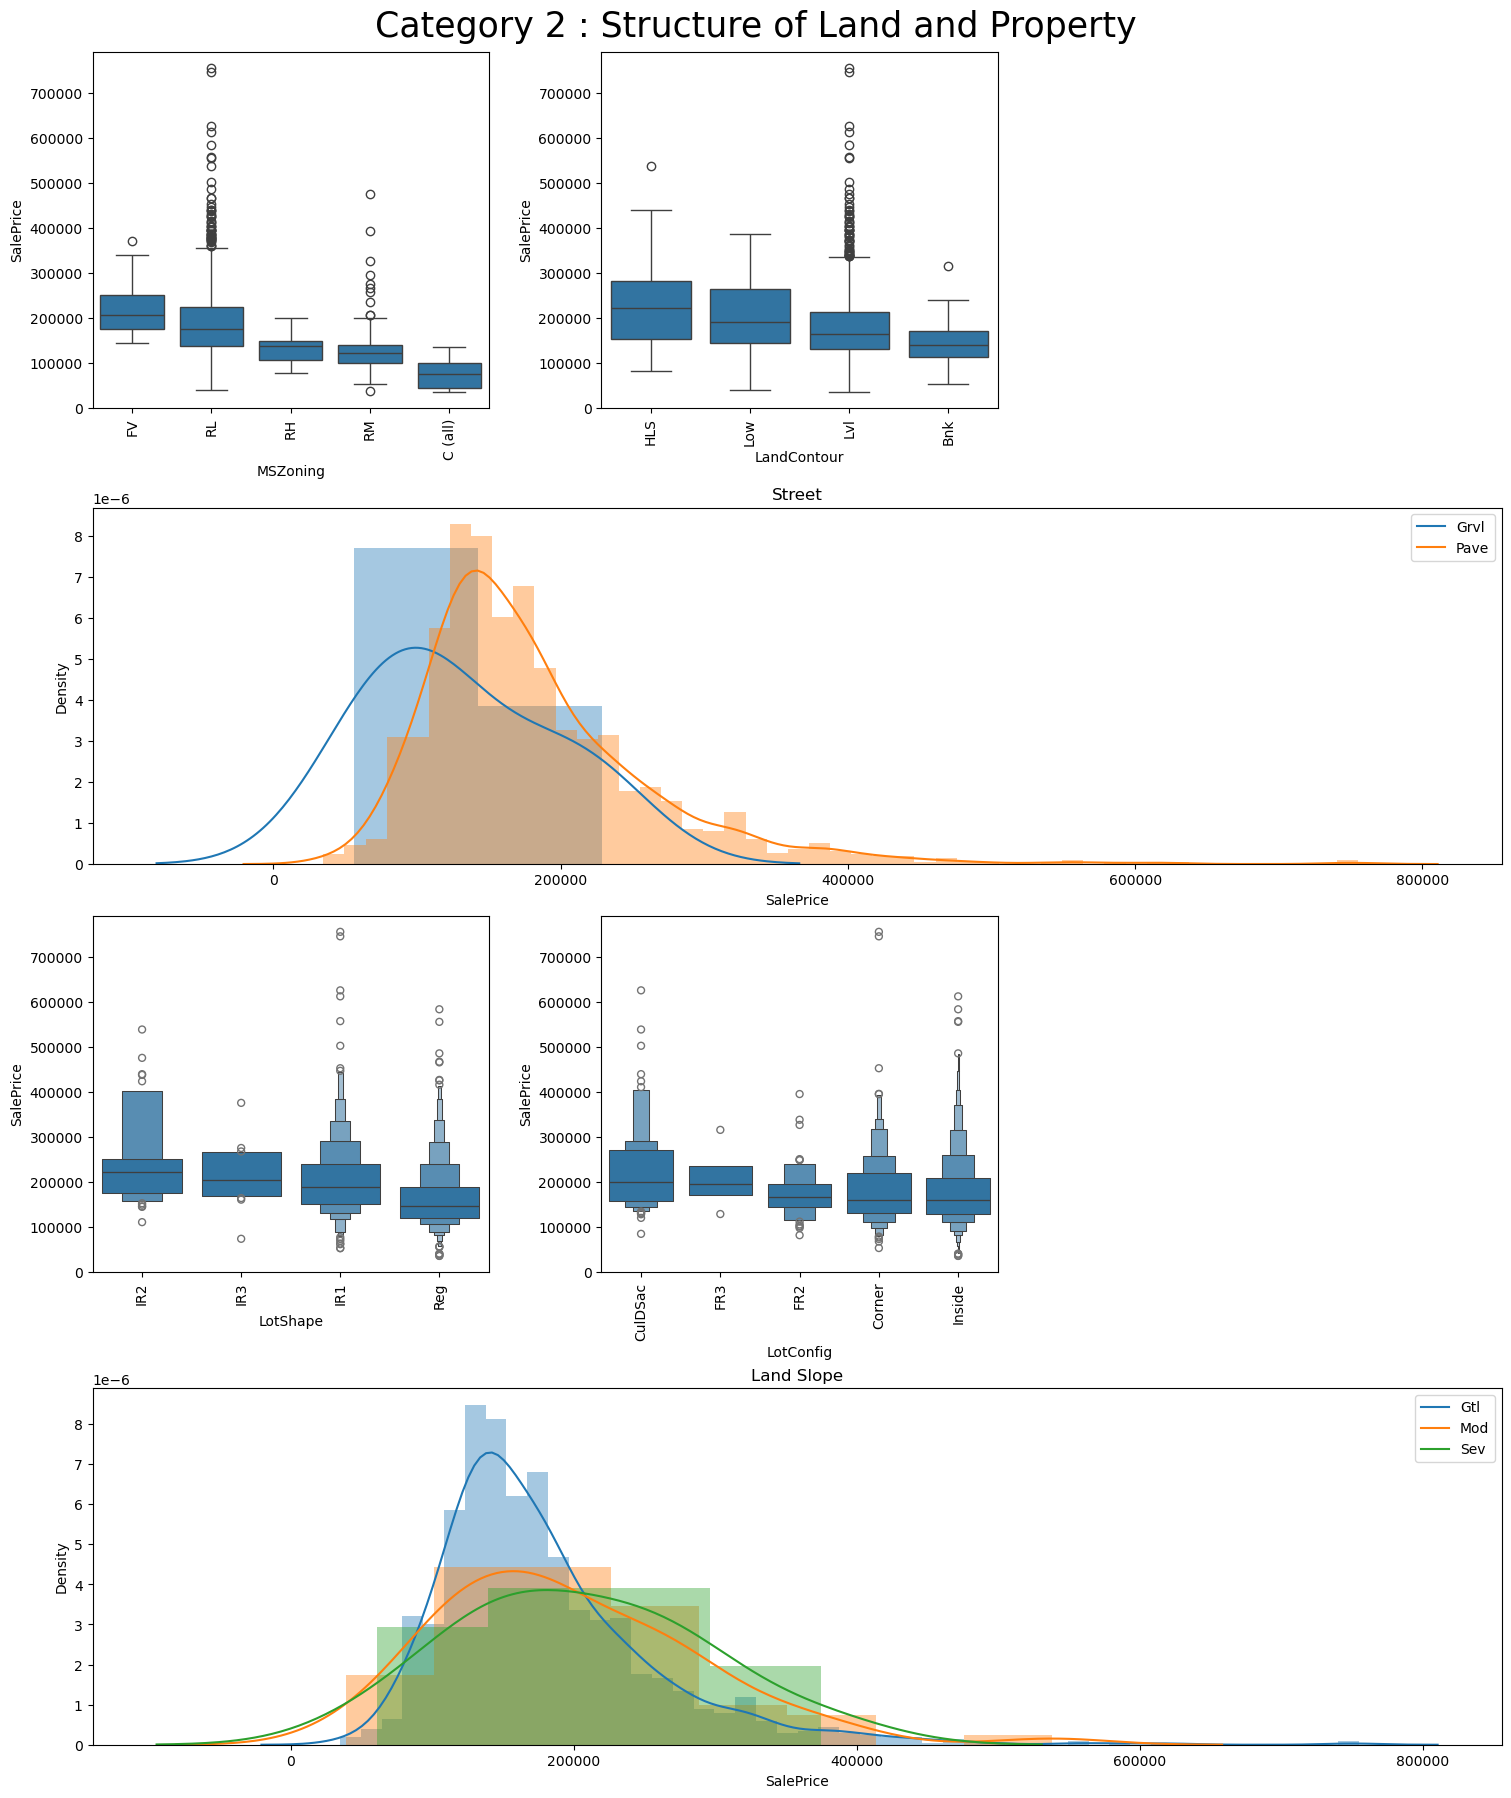

In [322]:
from matplotlib.gridspec import GridSpec 
# Set up the figure and GridSpec layout
fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = GridSpec(6, 3, figure=fig)
plt.subplot(gs[0,0])
table = df.groupby(['MSZoning'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='MSZoning',y="SalePrice",order=table['MSZoning'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = df.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:])
a1 = sns.distplot(df[df['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(df[df['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table = df.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = df.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
a1 = sns.distplot(df[df['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(df[df['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(df[df['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

fig.suptitle("Category 2 : Structure of Land and Property",fontsize=25);

**Category 3 :: Overall Quality and Condition**

In [324]:
cat2=['OverallQual','OverallCond']

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

In [326]:
   
df_new['OverallQual'] = df_new['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallQual'] = df_new['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

df_new['OverallCond'] = df_new['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df_new['OverallCond'] = df_new['OverallCond'].astype(object)

C:\Users\User\AppData\Local\Temp\ipykernel_15468\1117346326.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\1117346326.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



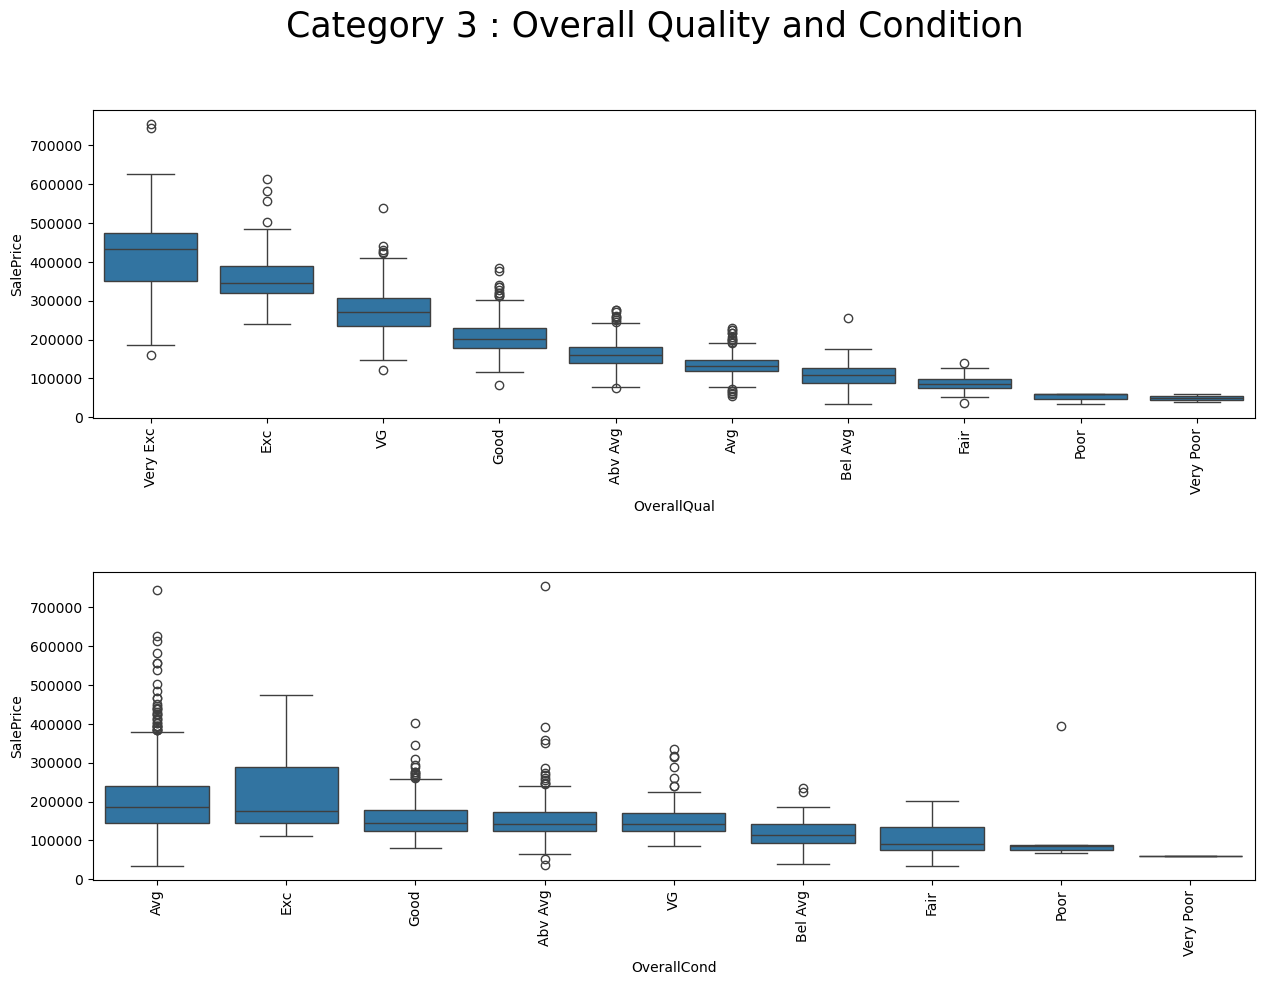

In [327]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = df_new.groupby(['OverallQual'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df_new,x='OverallQual',y="SalePrice",order=table['OverallQual'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df_new.groupby(['OverallCond'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df_new,x='OverallCond',y="SalePrice",order=table['OverallCond'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Category 3 : Overall Quality and Condition",fontsize=25);

**Category 4 :: Location and Style**

In [329]:
cat2=['Neighborhood','Condition1', 'Condition2','Utilities','BldgType', 'HouseStyle']

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

Utilities: Type of utilities available

BldgType: Type of dwelling

HouseStyle: Style of dwelling

C:\Users\User\AppData\Local\Temp\ipykernel_15468\2707837967.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\2707837967.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\2707837967.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\2707837967.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\2707837967.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\Ap

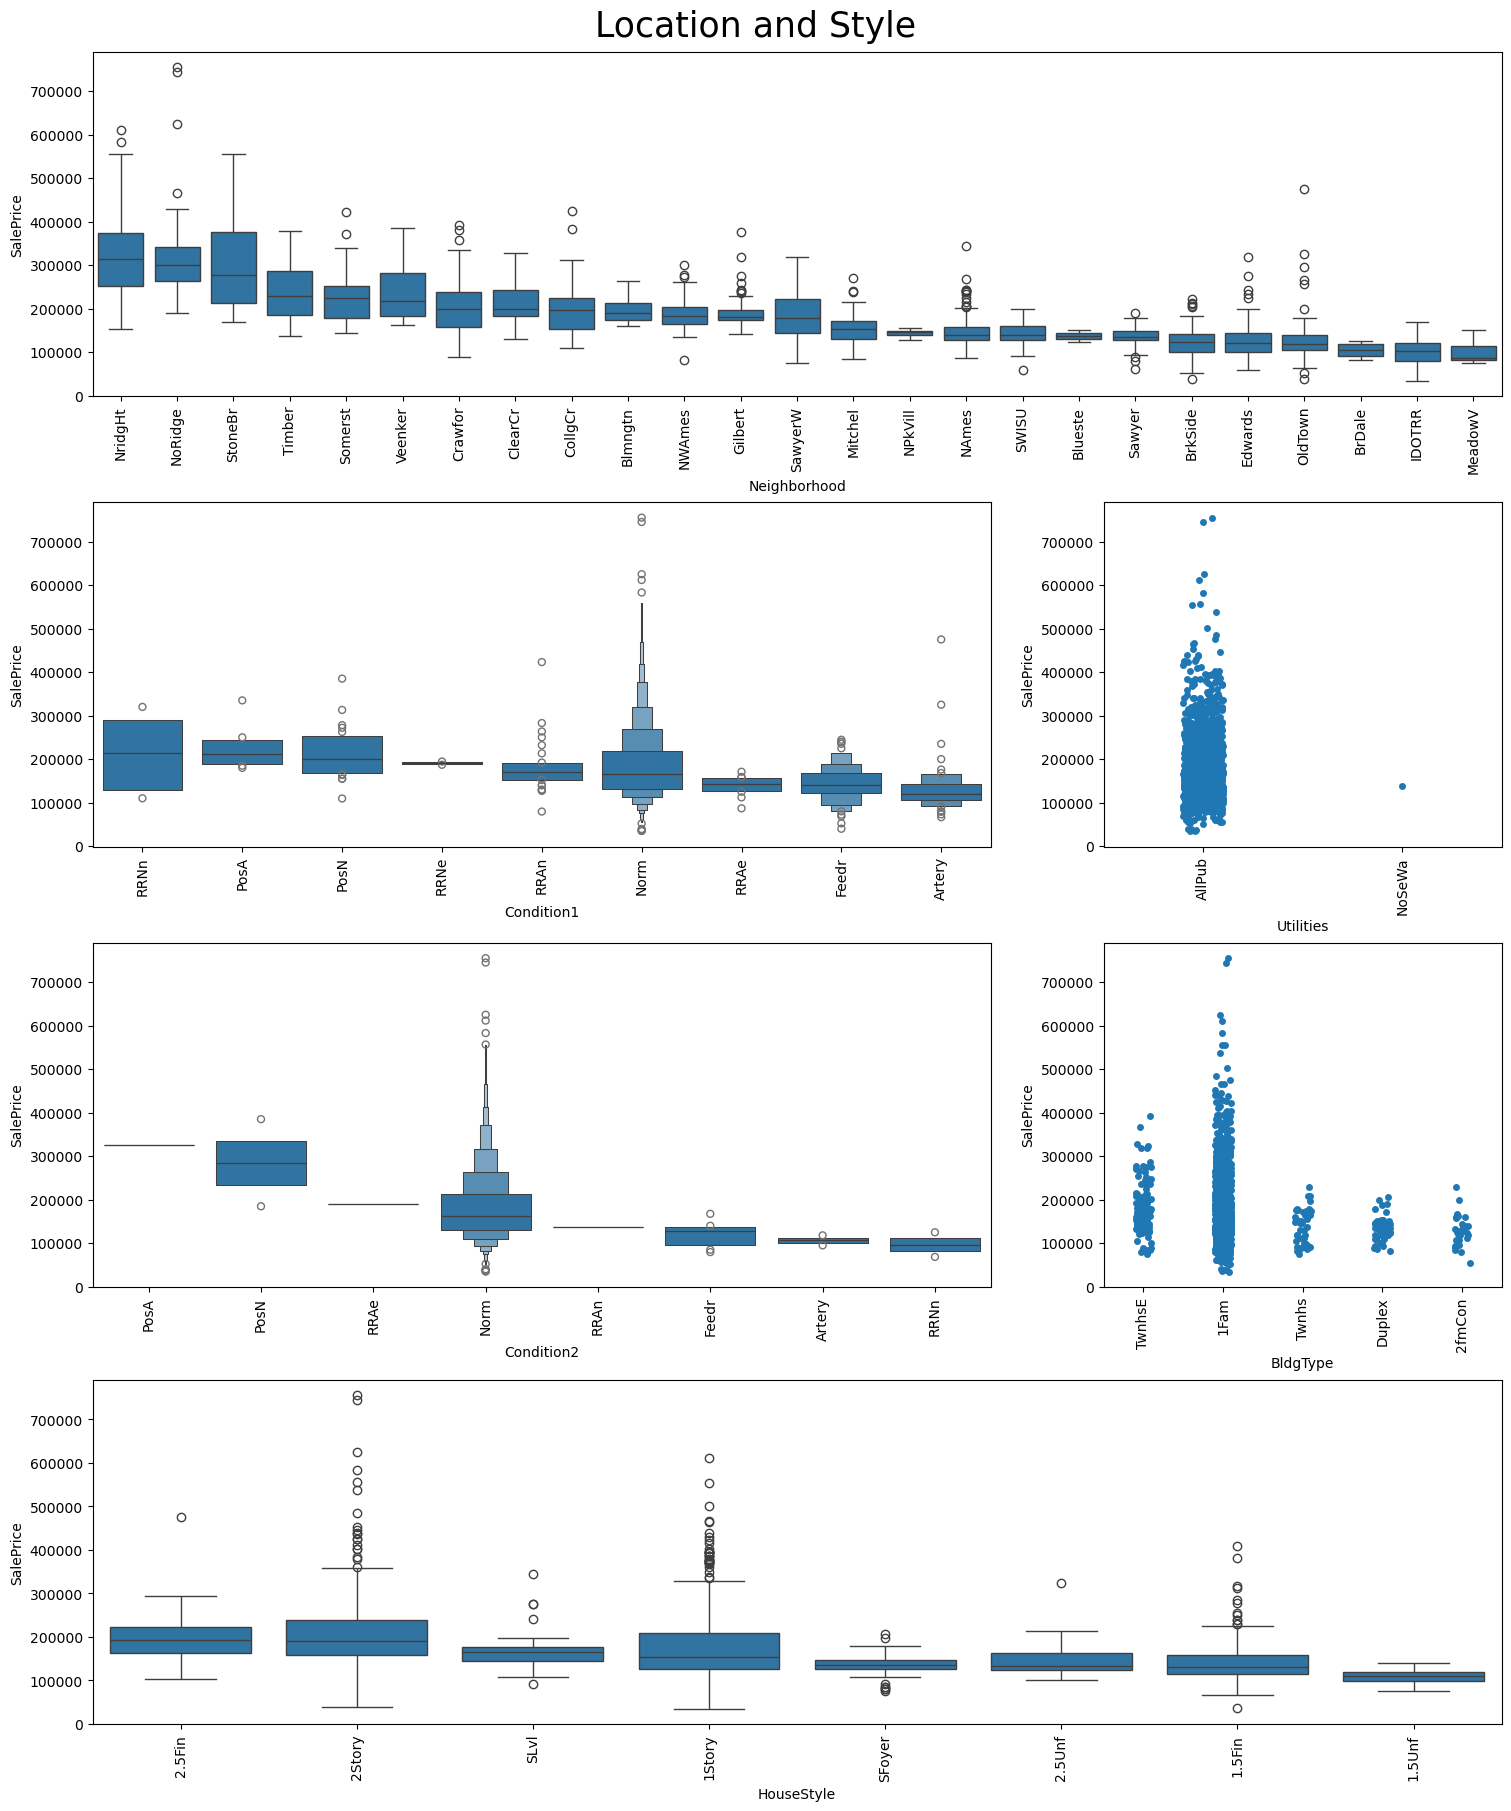

In [331]:
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = df.groupby(['Neighborhood'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='Neighborhood',y="SalePrice",order=table['Neighborhood'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
table = df.groupby(['Condition1'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Condition1',y="SalePrice",order=table['Condition1'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,-1])
table = df.groupby(['Utilities'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='Utilities',y="SalePrice",order=table['Utilities'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,:-1])
table = df.groupby(['Condition2'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Condition2',y="SalePrice",order=table['Condition2'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,-1])
table = df.groupby(['BldgType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='BldgType',y="SalePrice",order=table['BldgType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
table = df.groupby(['HouseStyle'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='HouseStyle',y="SalePrice",order=table['HouseStyle'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Location and Style",fontsize=25);

In [332]:
table = df_new.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,Neighborhood,SalePrice
16,NridgHt,315000.000000
15,NoRidge,301500.000000
22,StoneBr,278000.000000
23,Timber,228475.000000
21,Somerst,225500.000000
24,Veenker,218000.000000
6,Crawfor,200624.000000
4,ClearCr,200250.000000
5,CollgCr,197200.000000
0,Blmngtn,191000.000000


**Category 5 :: Roofing,Foundation and housing exterior**

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type (Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick)

Foundation: Type of foundation

In [335]:
cat3=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'Foundation']

C:\Users\User\AppData\Local\Temp\ipykernel_15468\40587014.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\40587014.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\40587014.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\40587014.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



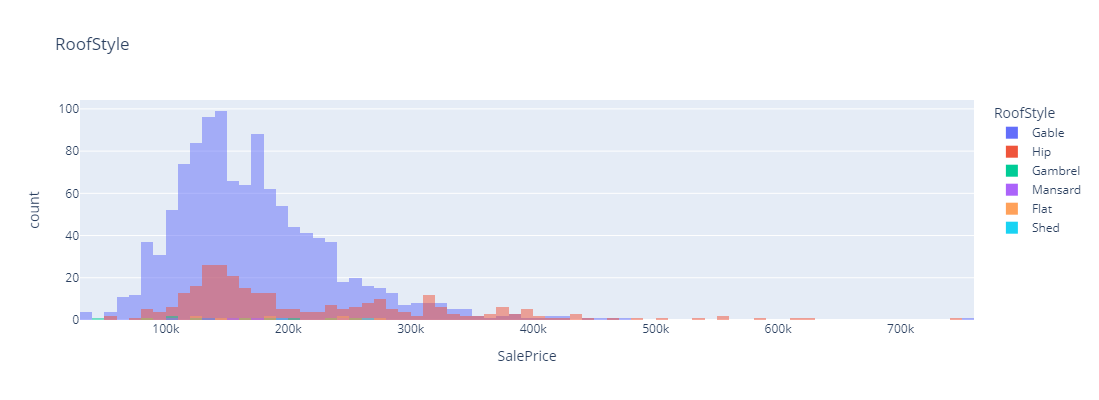

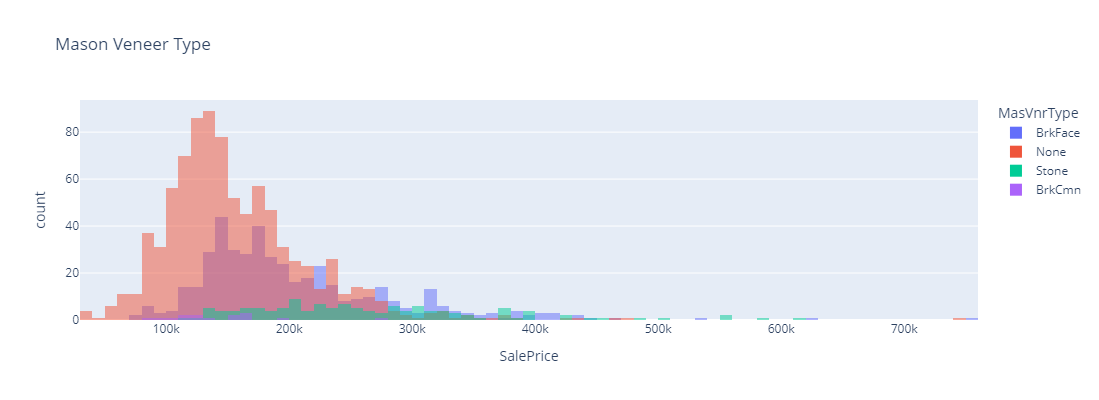

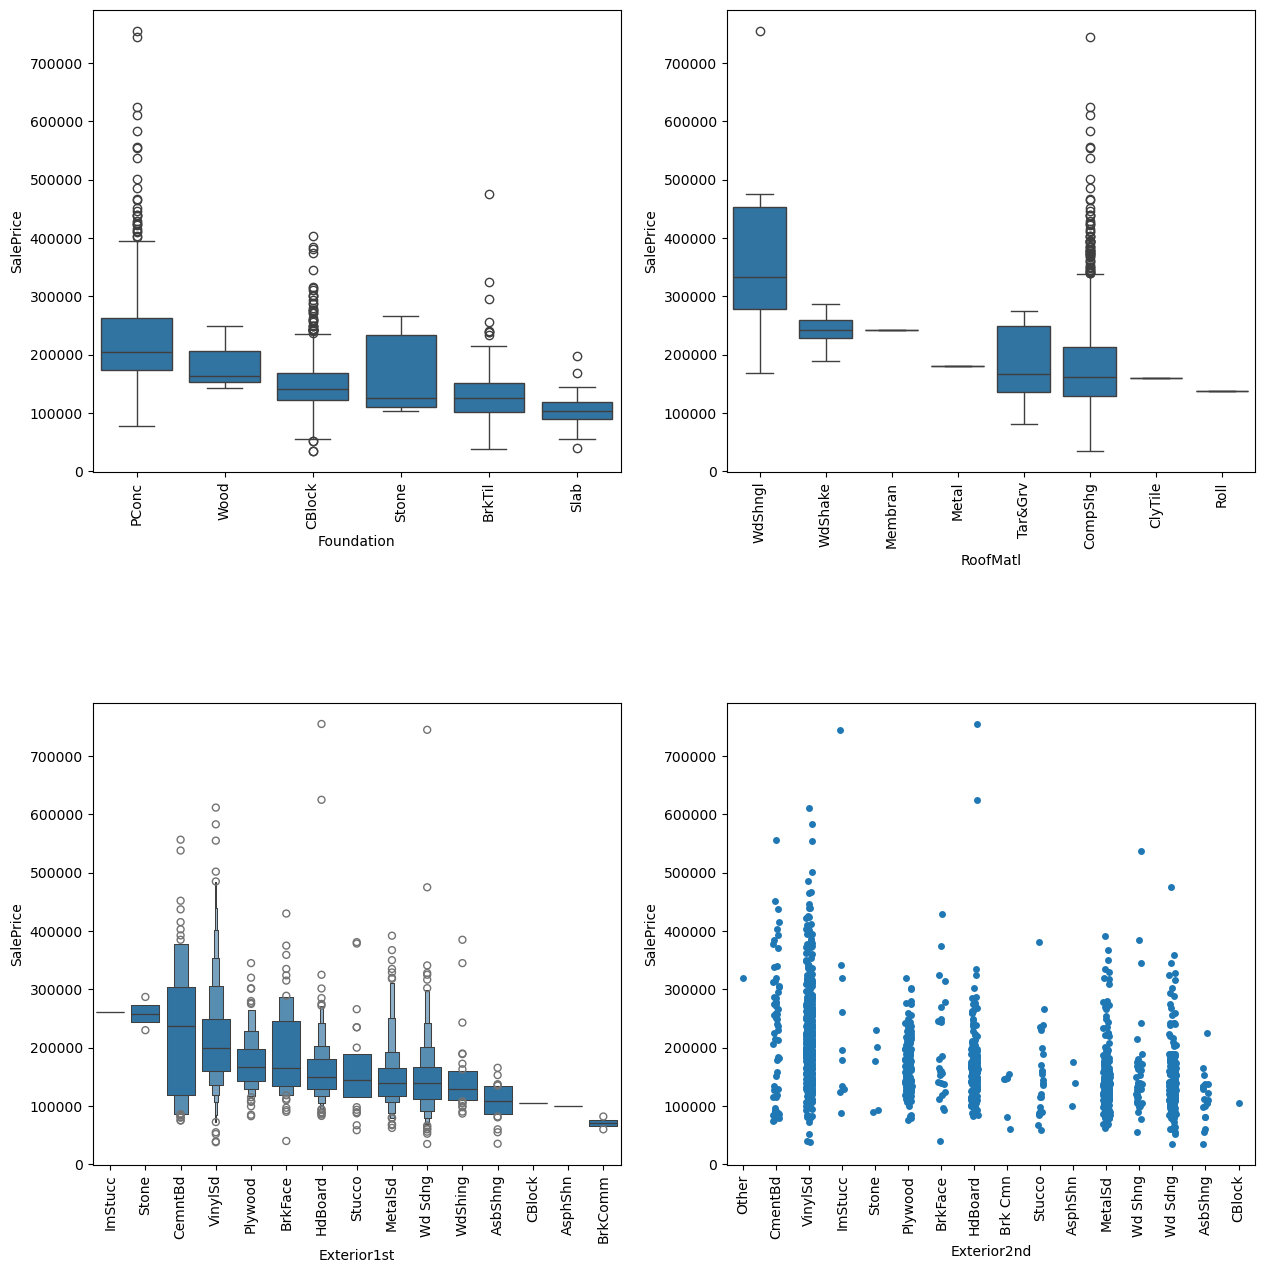

In [336]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
table = df.groupby(['Foundation'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='Foundation',y="SalePrice",order=table['Foundation'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
table = df.groupby(['RoofMatl'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='RoofMatl',y="SalePrice",order=table['RoofMatl'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,3)
table = df.groupby(['Exterior1st'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Exterior1st',y="SalePrice",order=table['Exterior1st'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,4)
table = df.groupby(['Exterior2nd'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='Exterior2nd',y="SalePrice",order=table['Exterior2nd'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig = px.histogram(df, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
fig.update_layout(height=400)
fig.show()

In [337]:
table = df_new.groupby(['RoofStyle'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,RoofStyle,SalePrice
5,Shed,225000.000000
0,Flat,185000.000000
3,Hip,176500.000000
4,Mansard,175000.000000
1,Gable,160000.000000
2,Gambrel,139000.000000


In [338]:
table = df_new.groupby(['MasVnrType'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Greys')

,MasVnrType,SalePrice
3,Stone,246839.000000
1,BrkFace,181000.000000
2,None,143125.000000
0,BrkCmn,139000.000000


**Category 6 :: Exterior Condition and Quality**

In [340]:
cat6=['ExterQual', 'ExterCond']

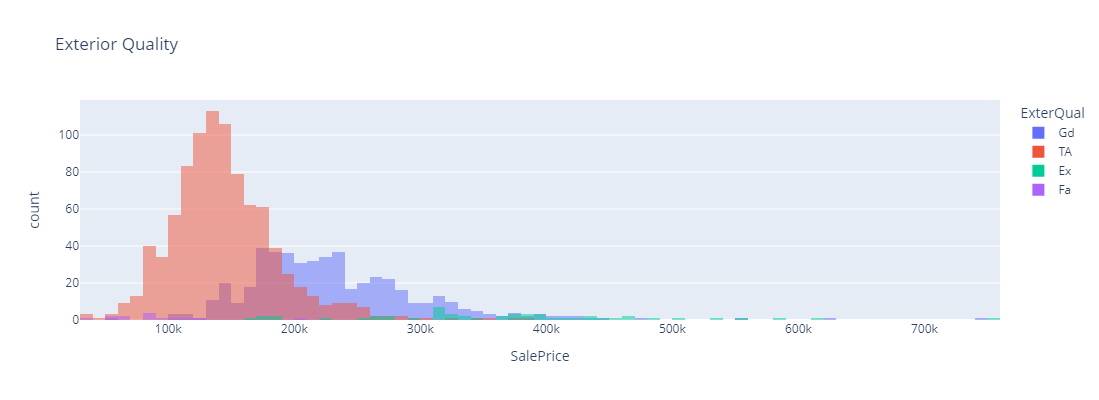

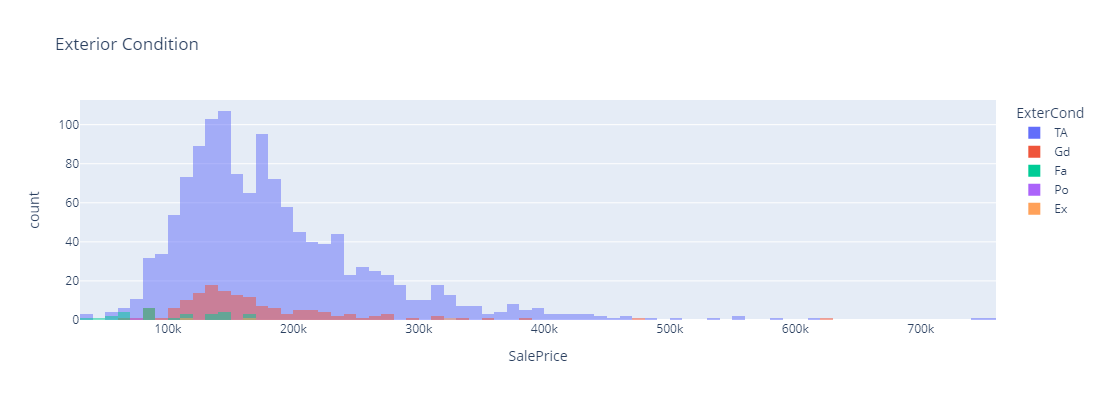

In [341]:
fig = px.histogram(df, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()


**Category 7 :: Basements**

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinType2: Rating of basement finished area (if multiple types)

In [344]:
cat7=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

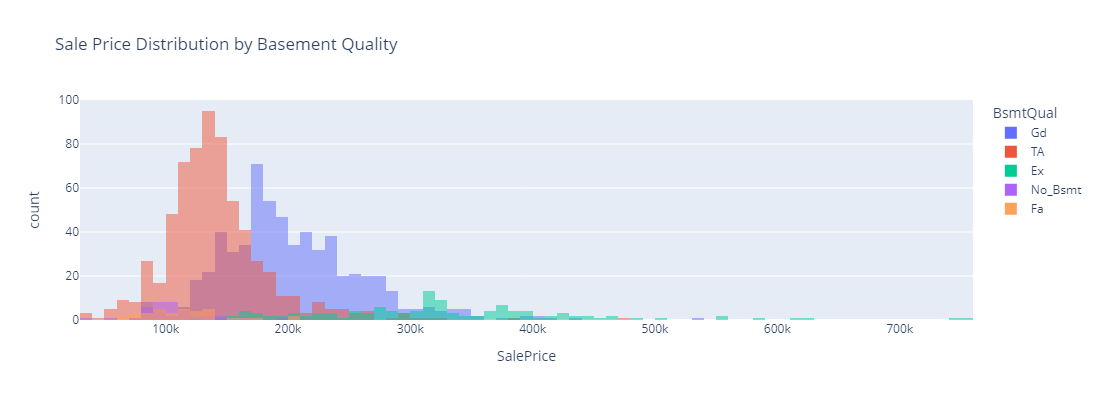

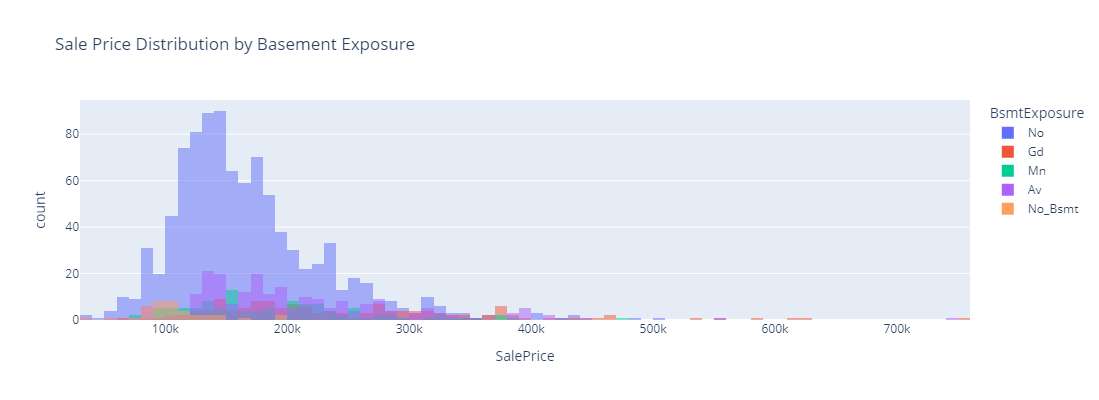

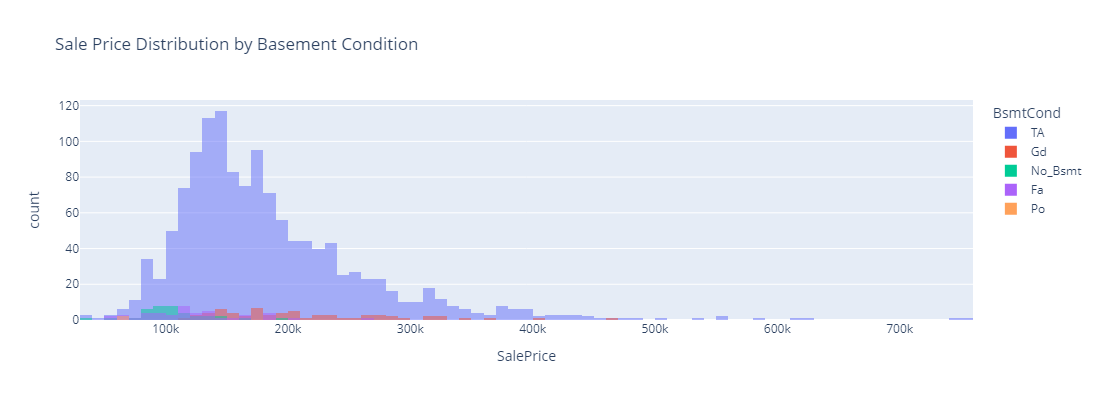

In [345]:
fig1 = px.histogram(df, x="SalePrice", color='BsmtQual', 
                     barmode="overlay", height=400, 
                     title='Sale Price Distribution by Basement Quality')
fig1.show()

# Create a histogram for SalePrice by Basement Exposure
fig2 = px.histogram(df, x="SalePrice", color='BsmtExposure', 
                     barmode="overlay", height=400, 
                     title='Sale Price Distribution by Basement Exposure')
fig2.show()

# Create a histogram for SalePrice by Basement Condition
fig3 = px.histogram(df, x="SalePrice", color='BsmtCond', 
                     barmode="overlay", height=400, 
                     title='Sale Price Distribution by Basement Condition')
fig3.show()

**Category 10 :: Garage**

GarageType: Garage location

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageQual: Garage quality

GarageCond: Garage condition

In [348]:
cat8=['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

C:\Users\User\AppData\Local\Temp\ipykernel_15468\721694662.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\721694662.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_15468\721694662.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use t

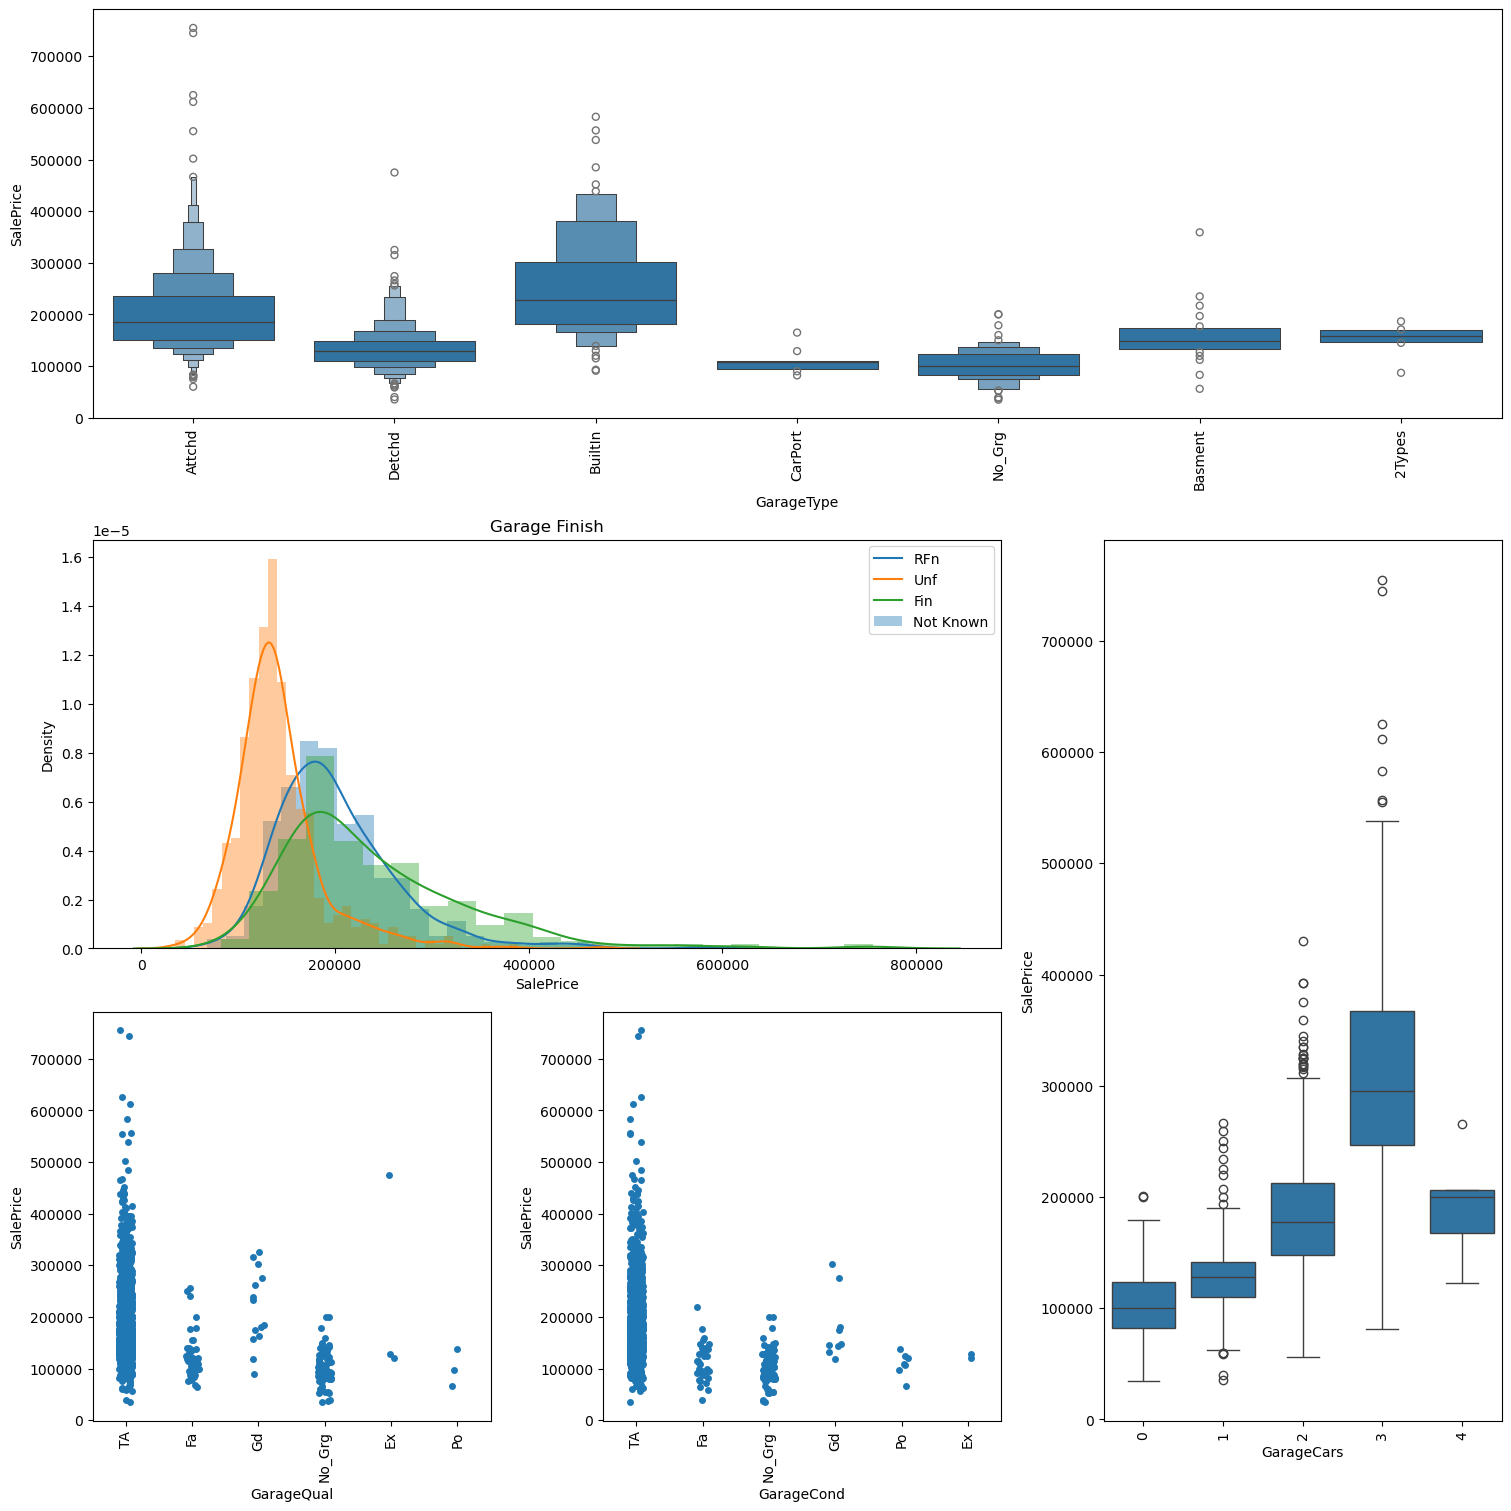

In [349]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(df[df['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

**Category 11 :: Outdoors**

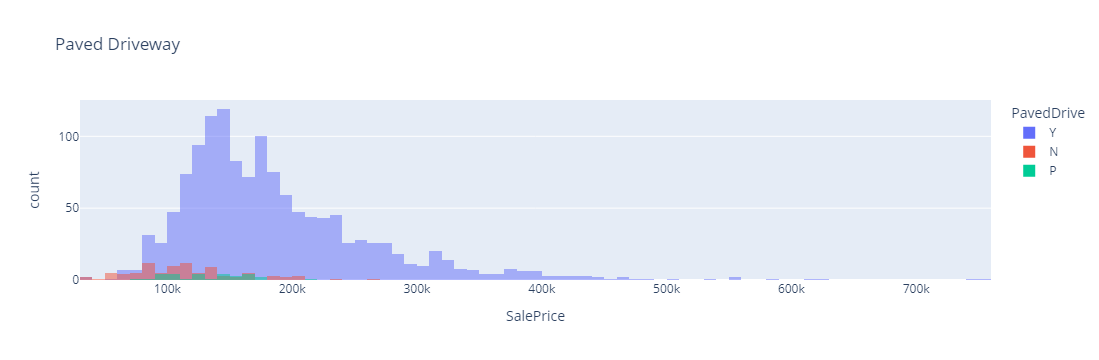

In [351]:
px.histogram(df, x="SalePrice", color='PavedDrive',barmode="overlay",title="Paved Driveway")

**Category 12 :: Sale Type and Condition**

C:\Users\User\AppData\Local\Temp\ipykernel_15468\689739394.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\User\AppData\Local\Temp\ipykernel_15468\689739394.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



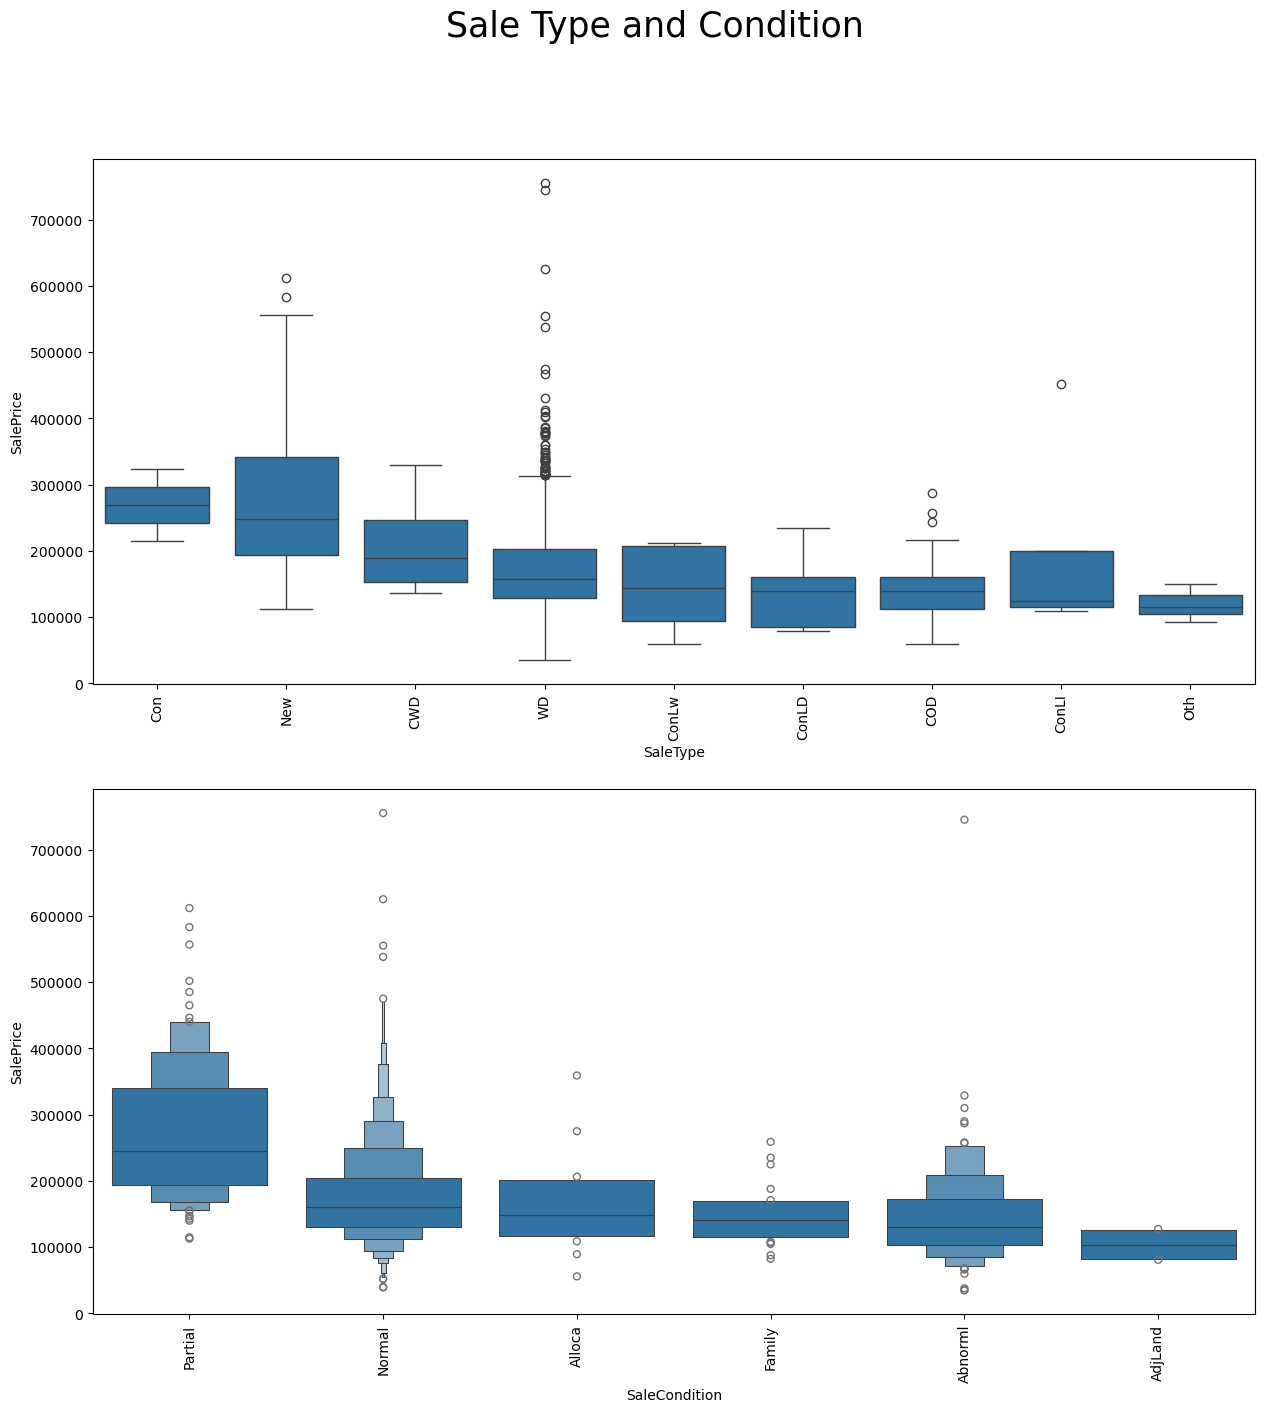

In [353]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
table = df.groupby(['SaleType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='SaleType',y="SalePrice",order=table['SaleType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df.groupby(['SaleCondition'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='SaleCondition',y="SalePrice",order=table['SaleCondition'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Sale Type and Condition",fontsize=25);

MSSubClass and MSZoning.
All the Quality features , as the houses with average ,good,excellent quality features will have higher Sale Price.
Fireplaces and Garage Cars, more the number , higher the Sale Price.
We also saw variation in Basement Exposure.
And lastly Sale Type and Sale condition are also one of the important features..

**Datetime Features**

In [356]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

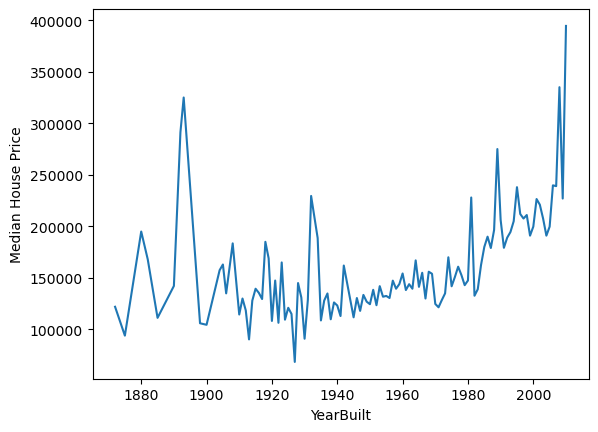

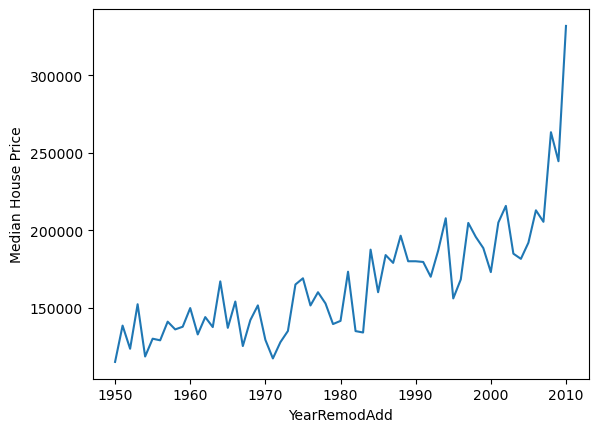

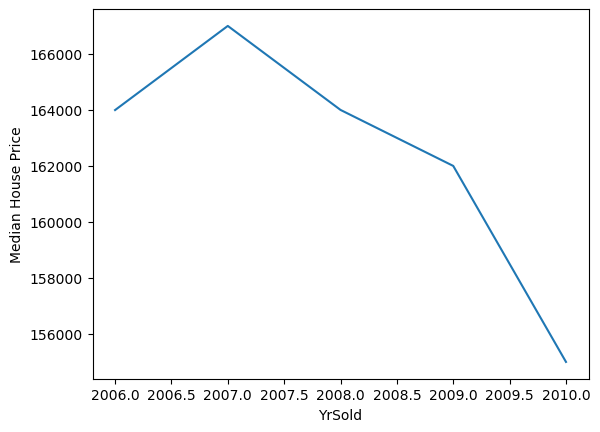

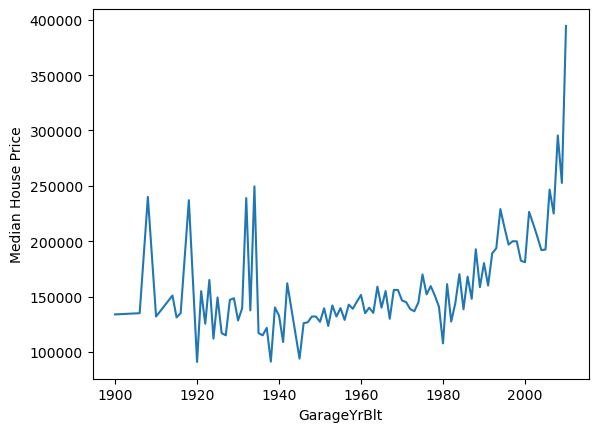

In [357]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = df.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

**Outliers**

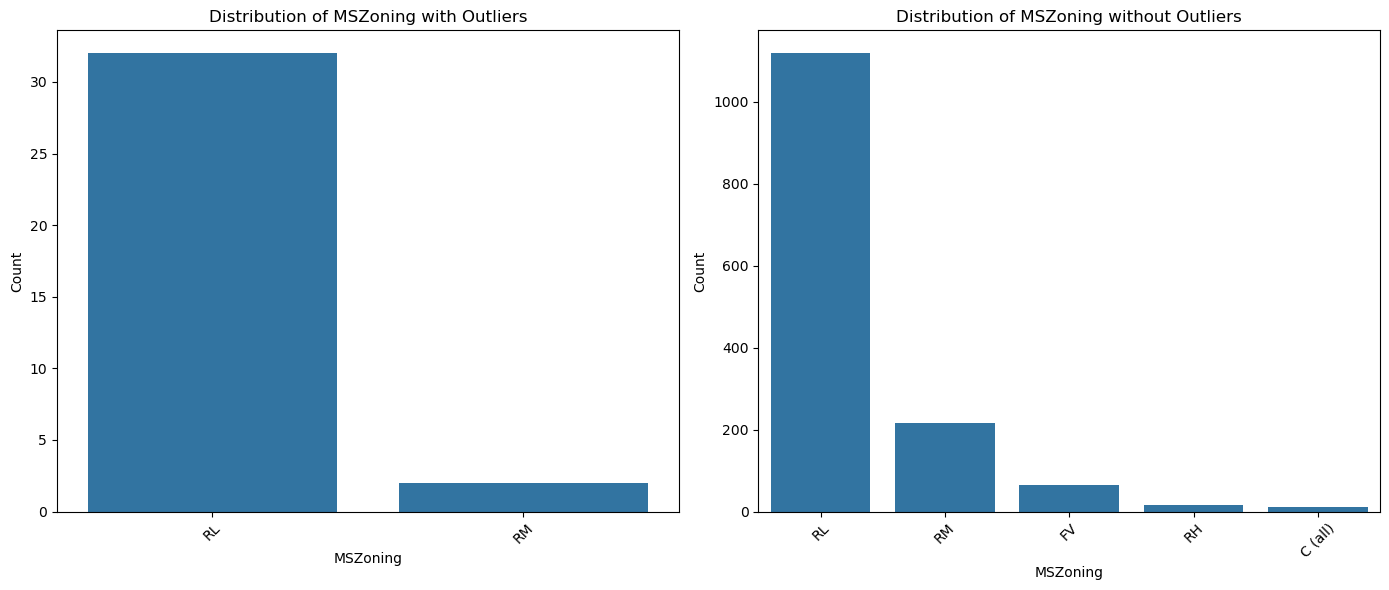

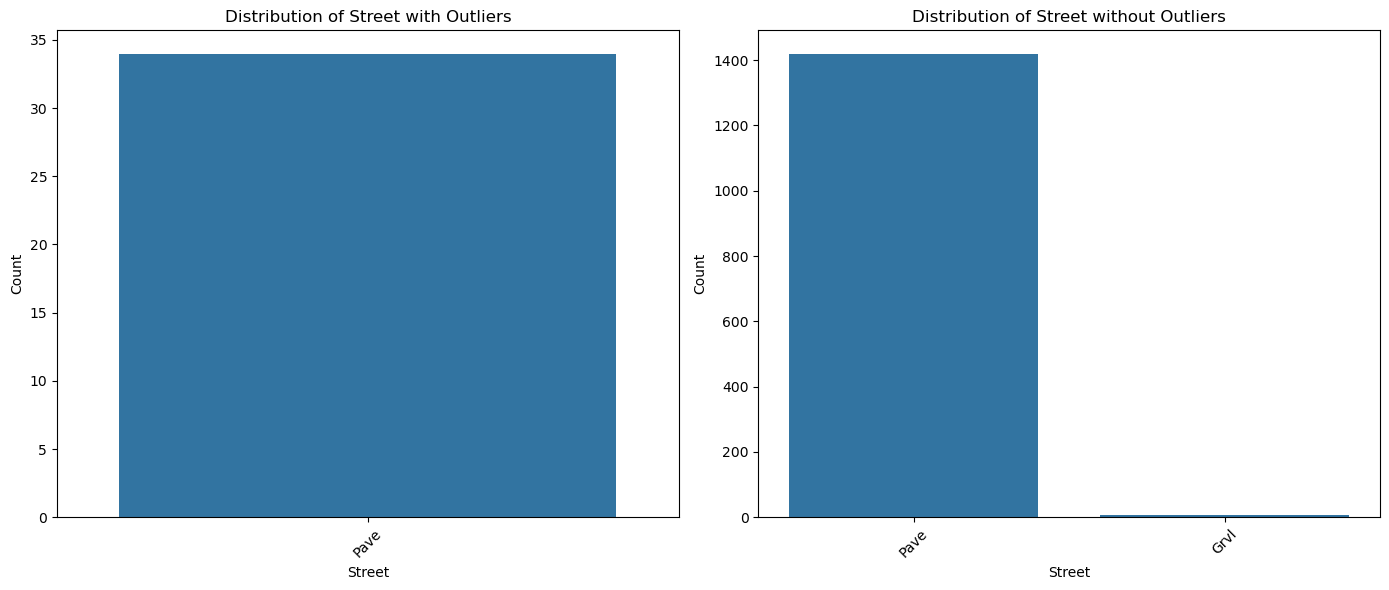

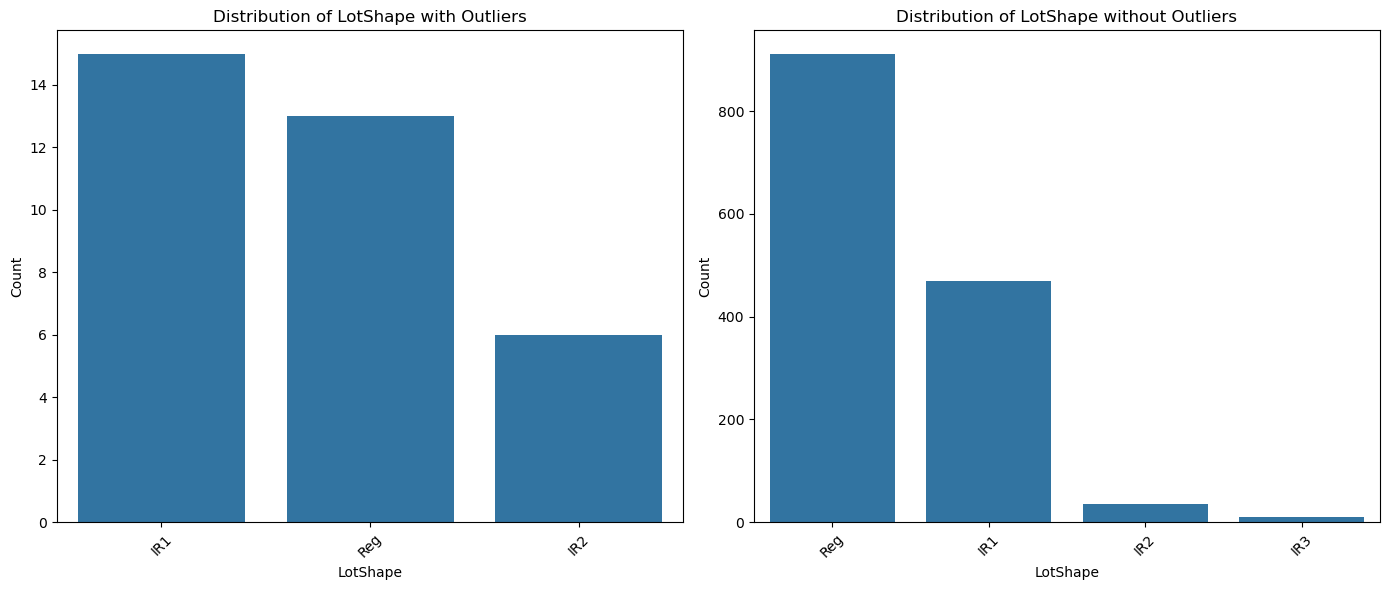

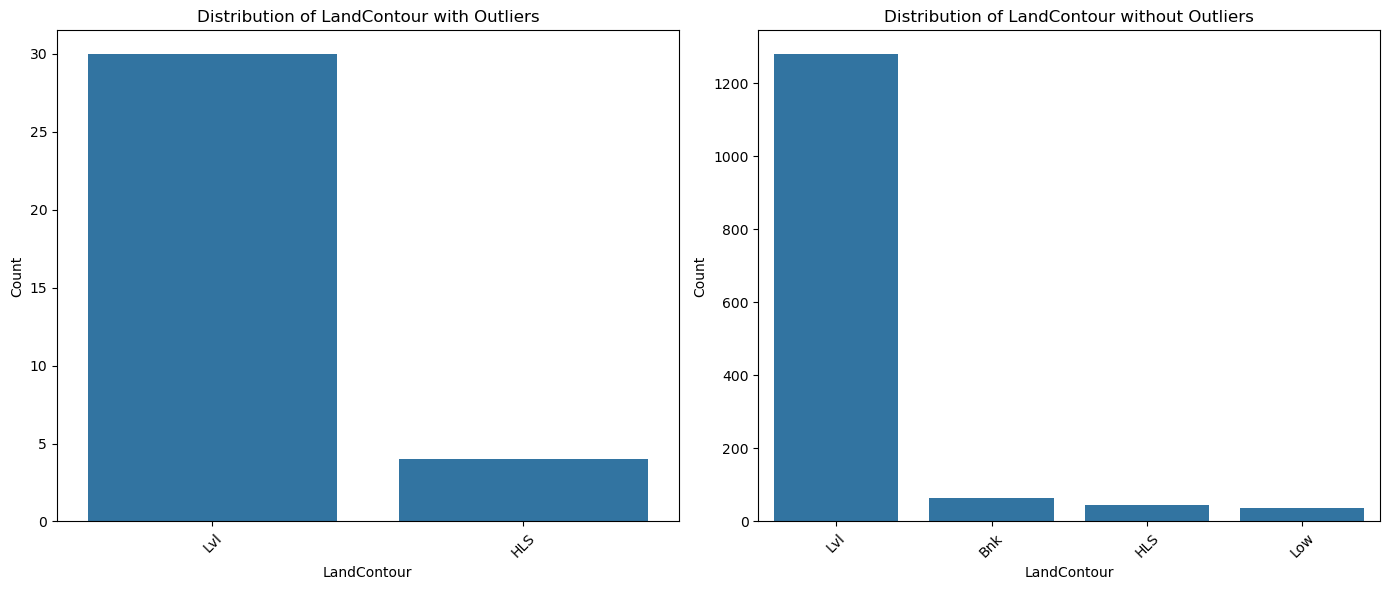

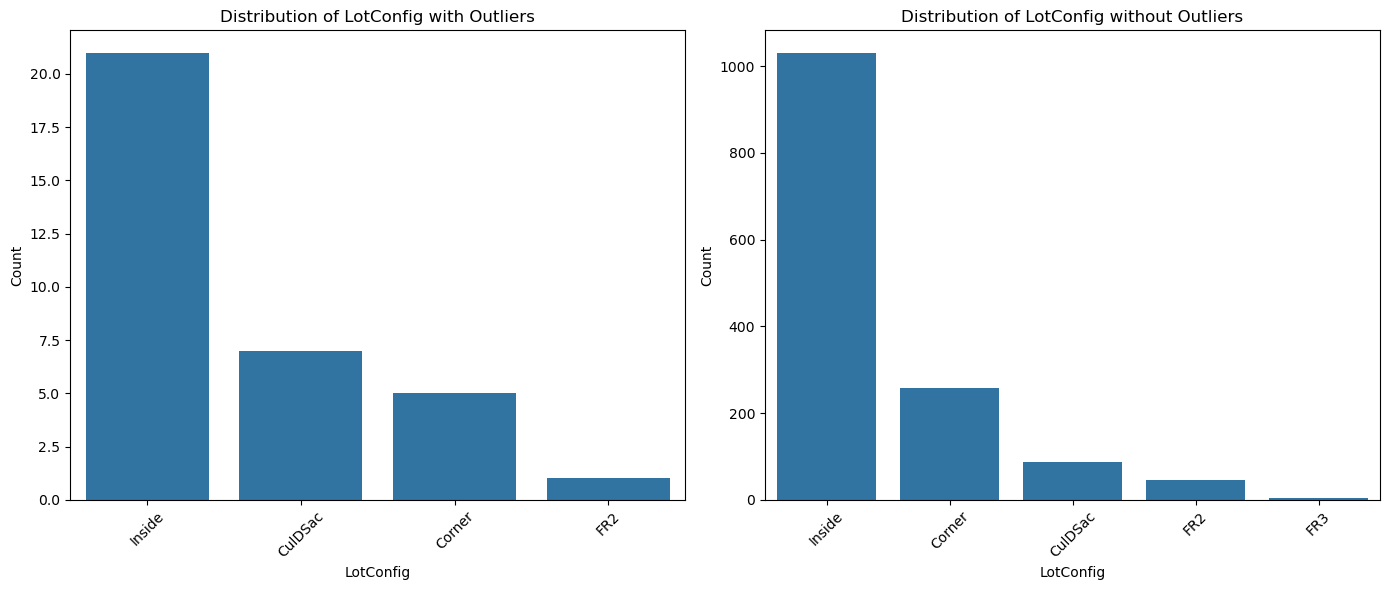

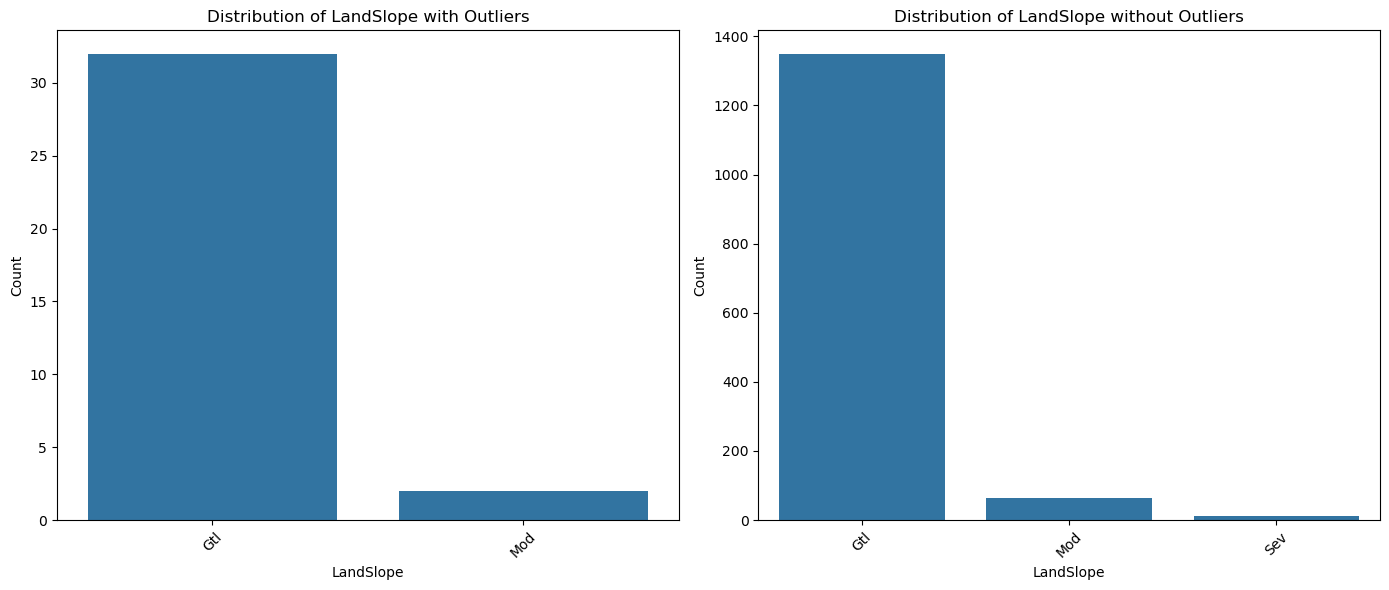

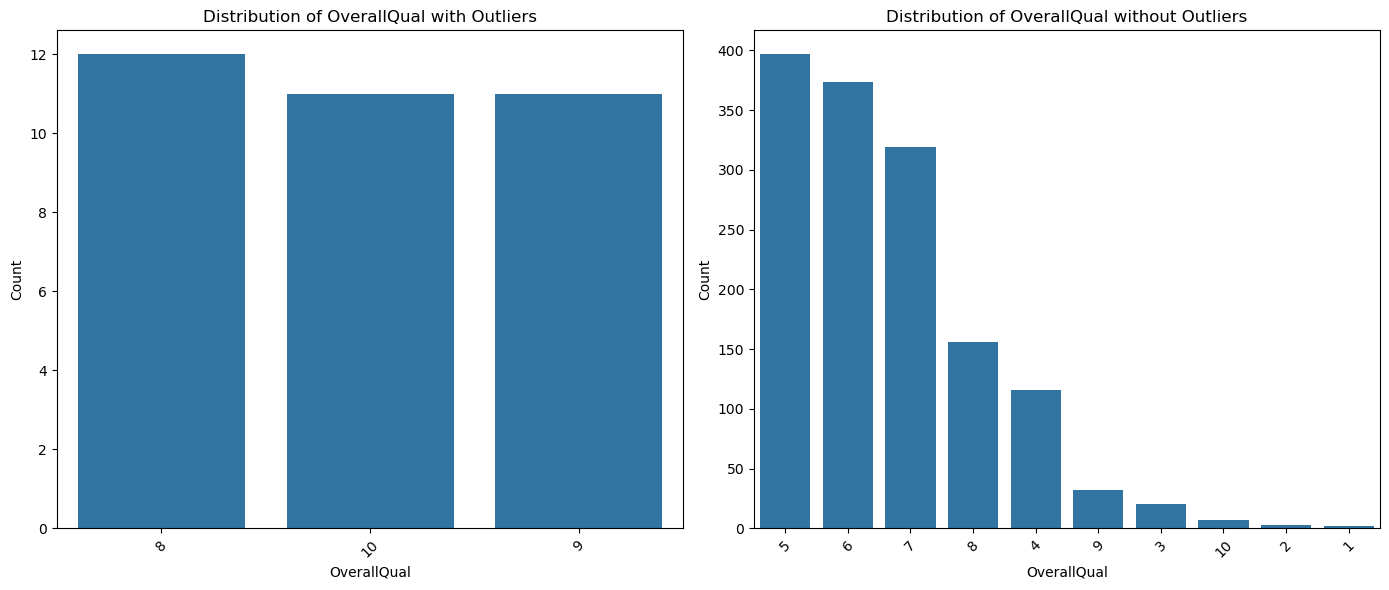

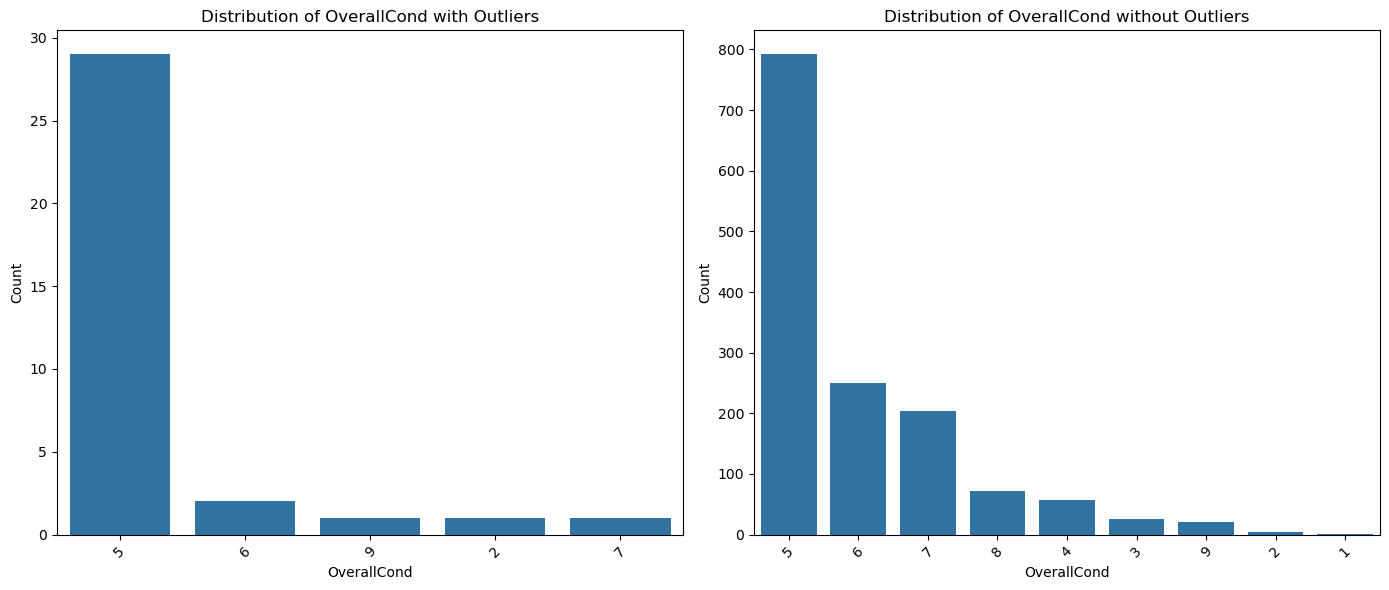

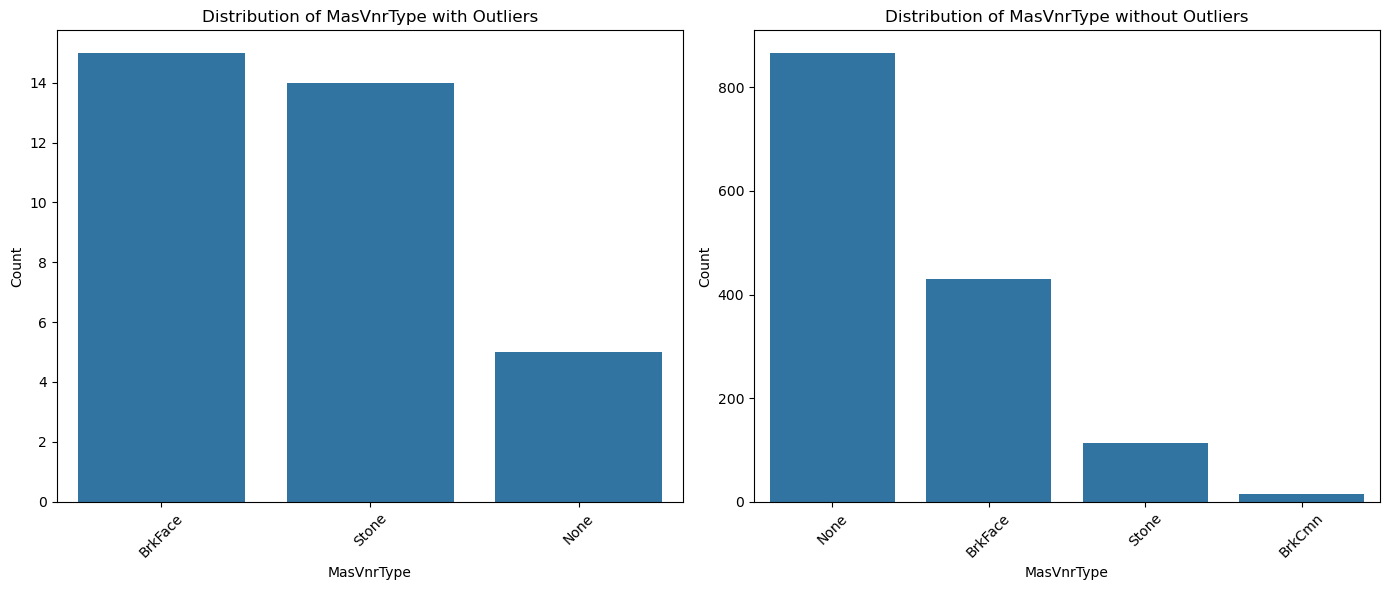

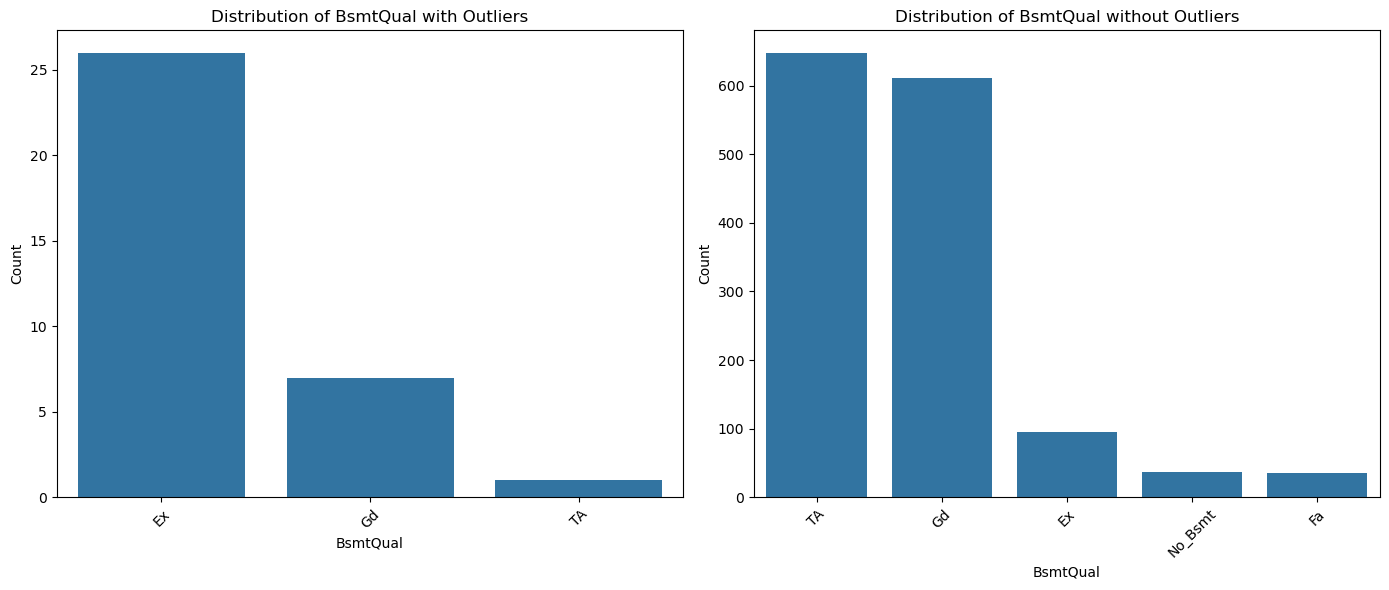

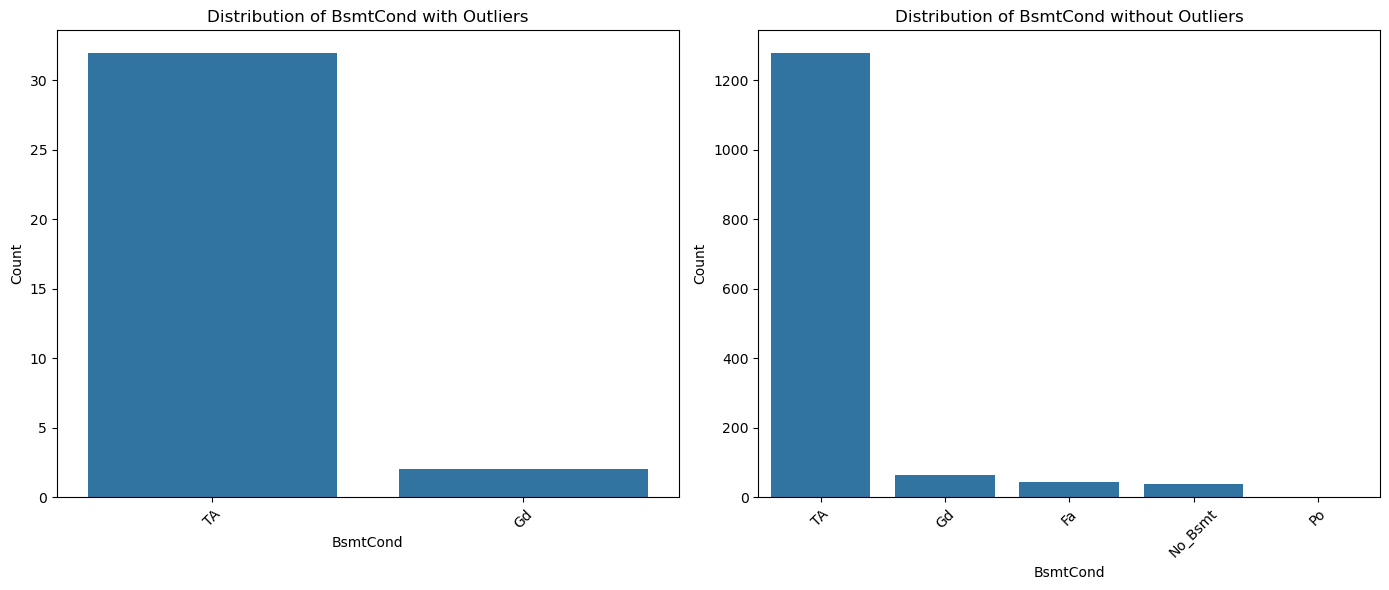

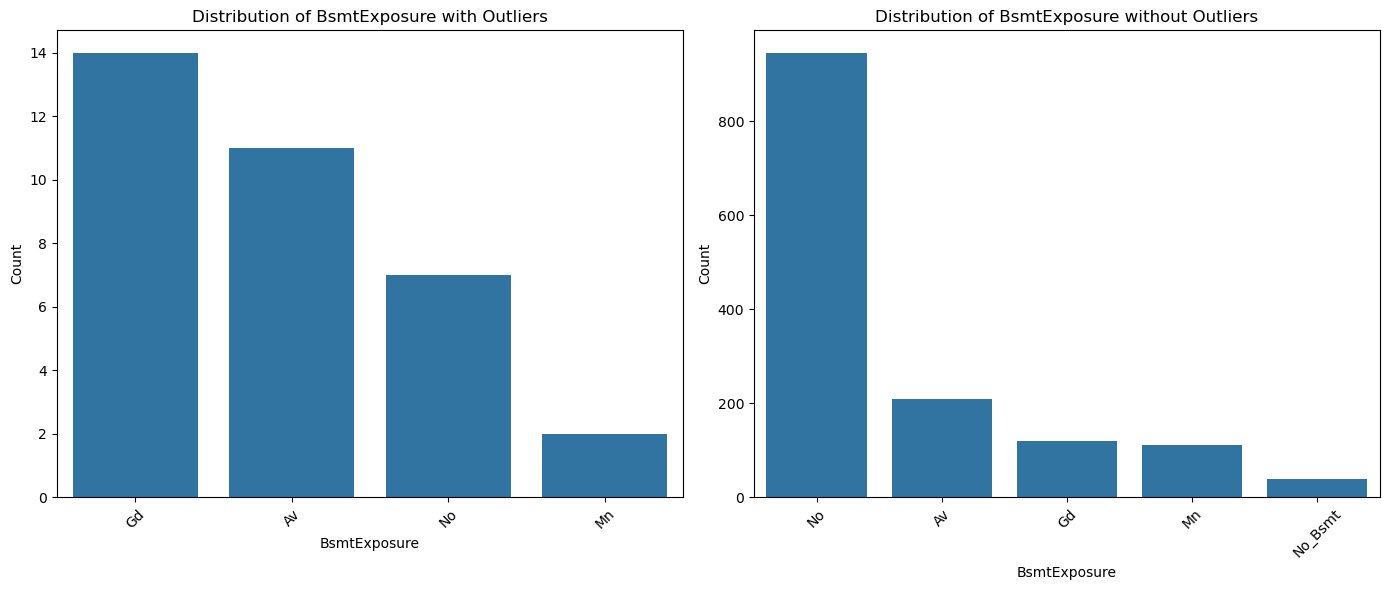

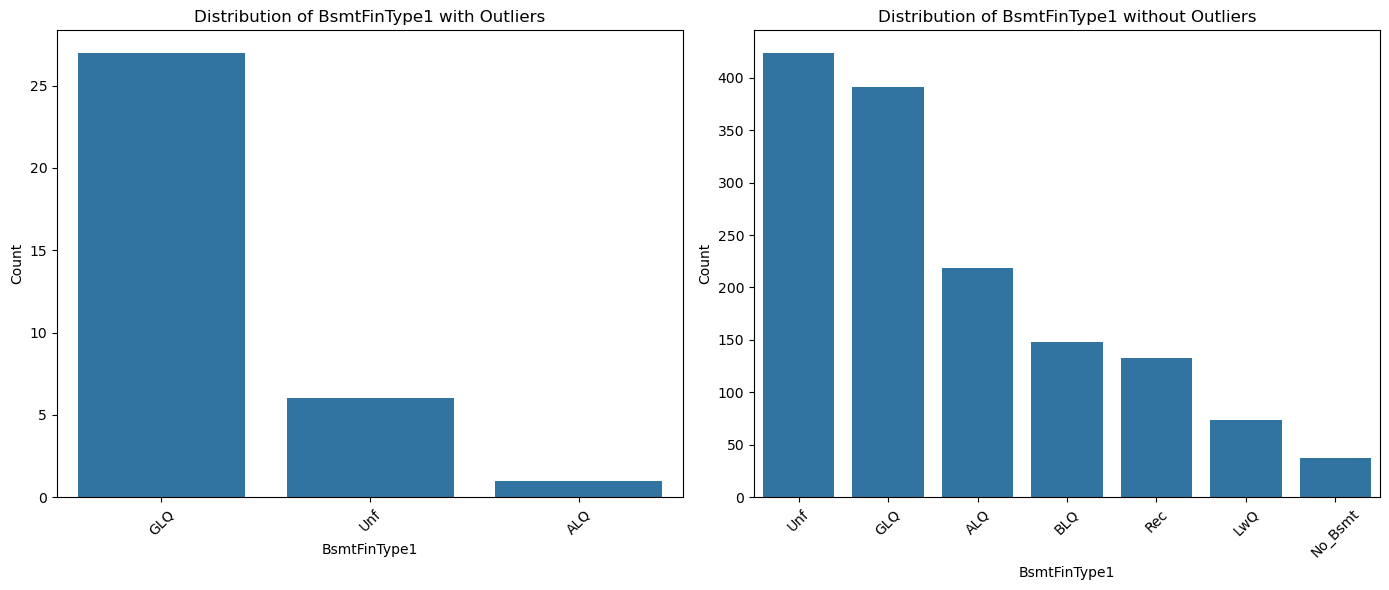

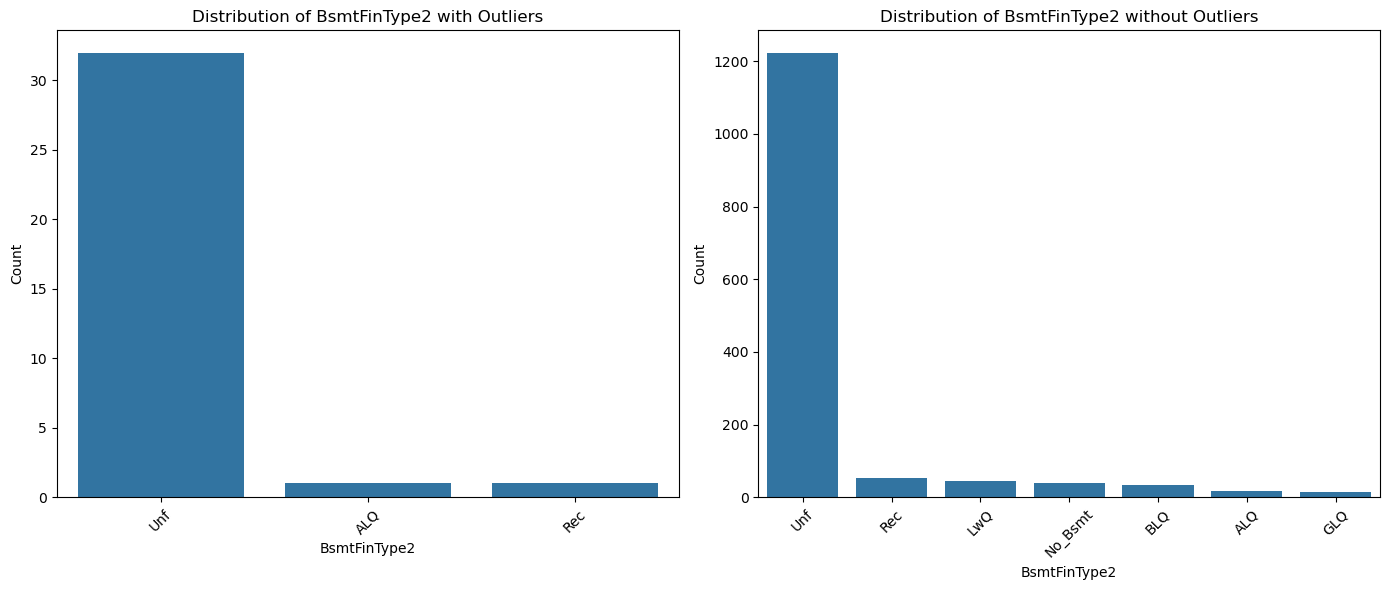

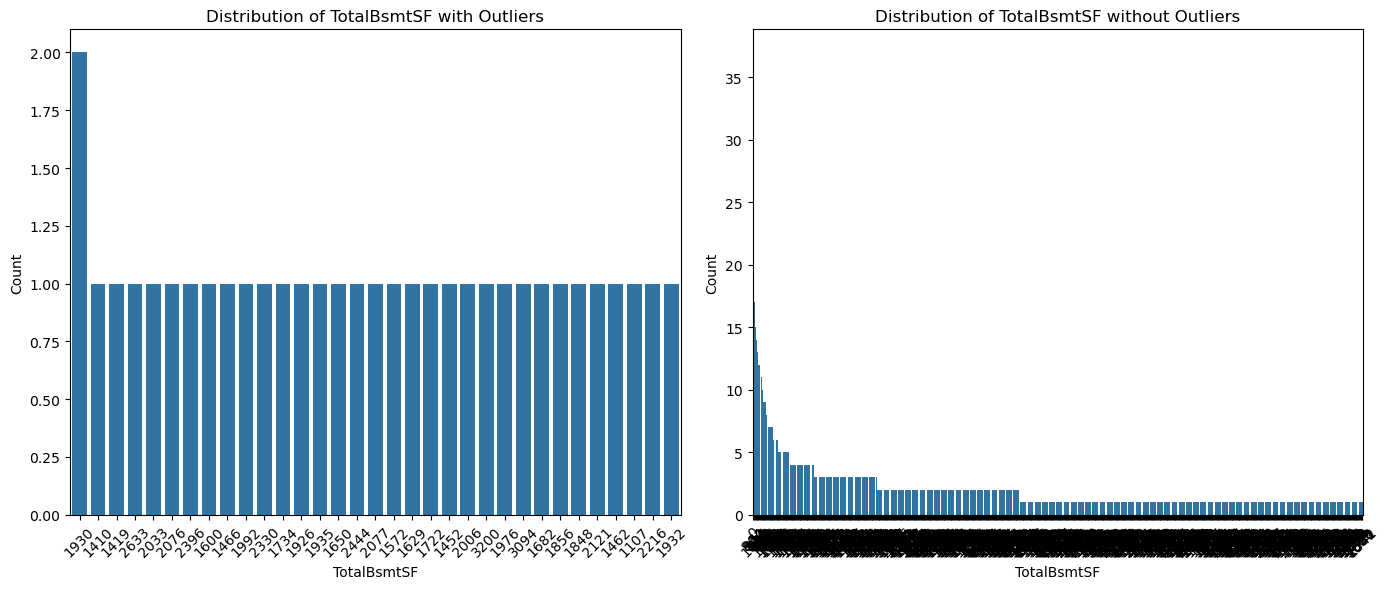

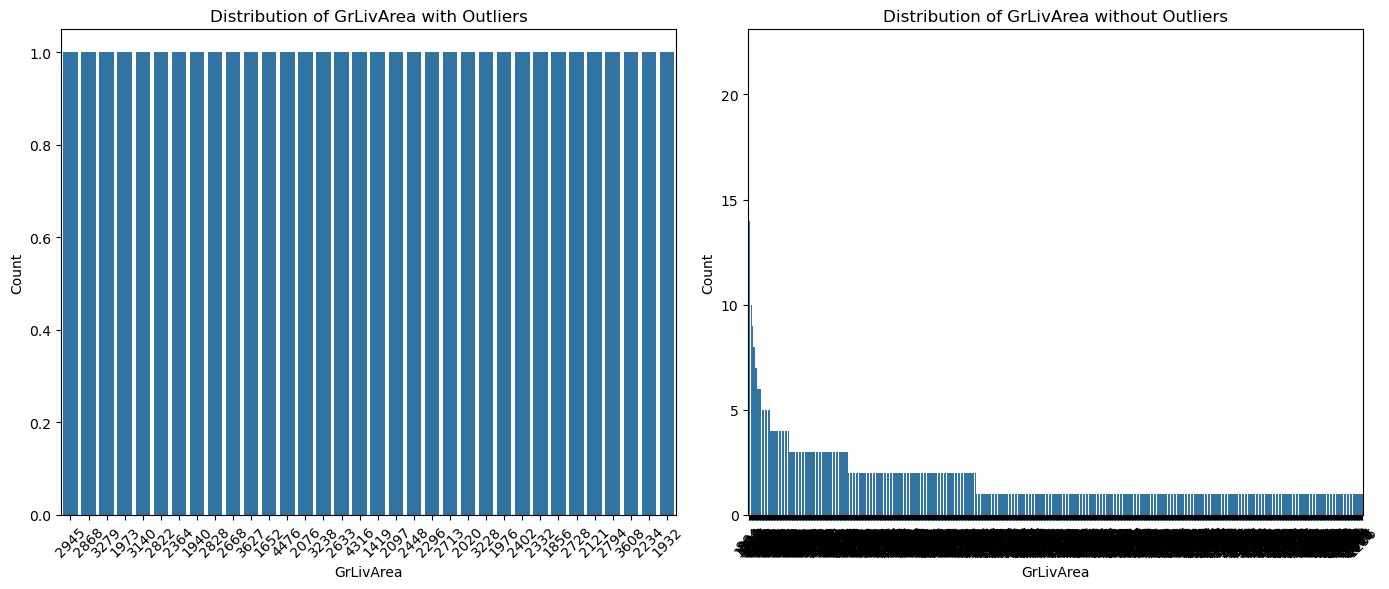

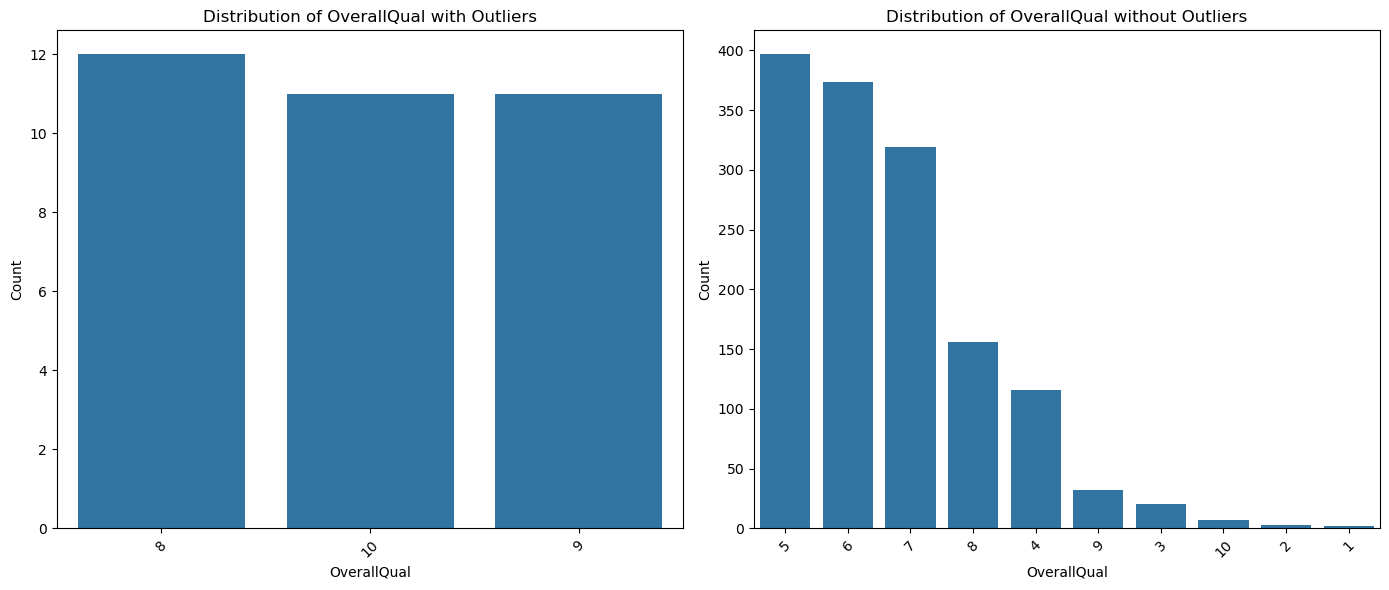

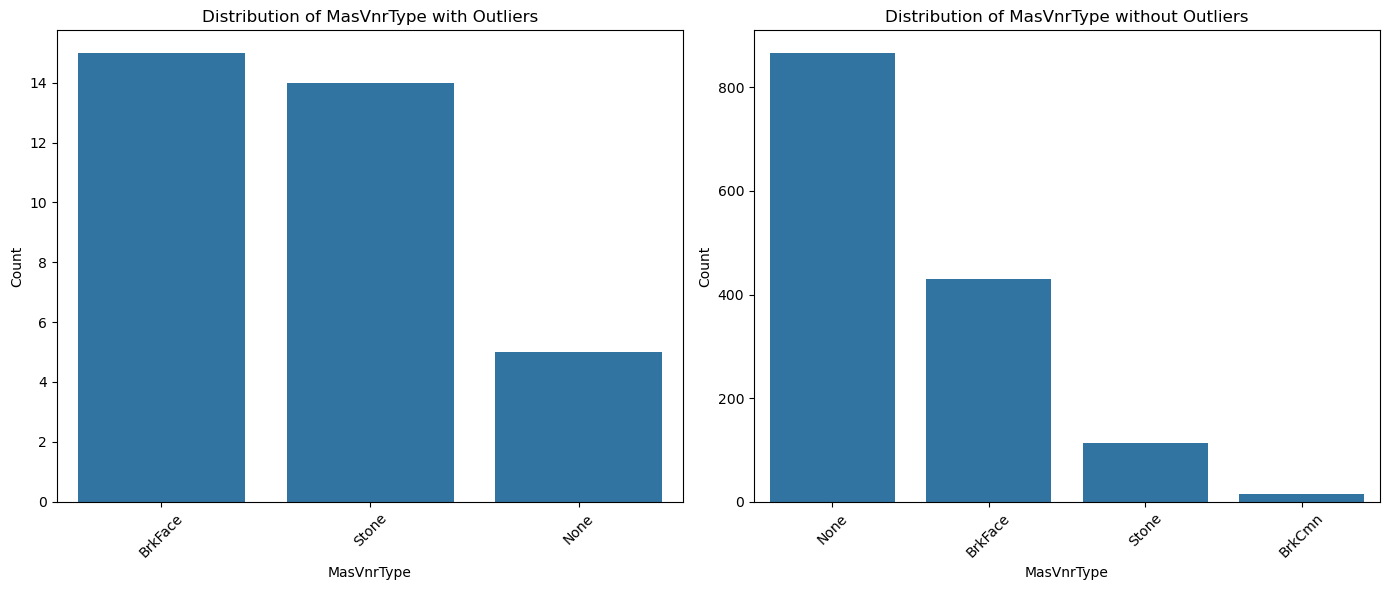

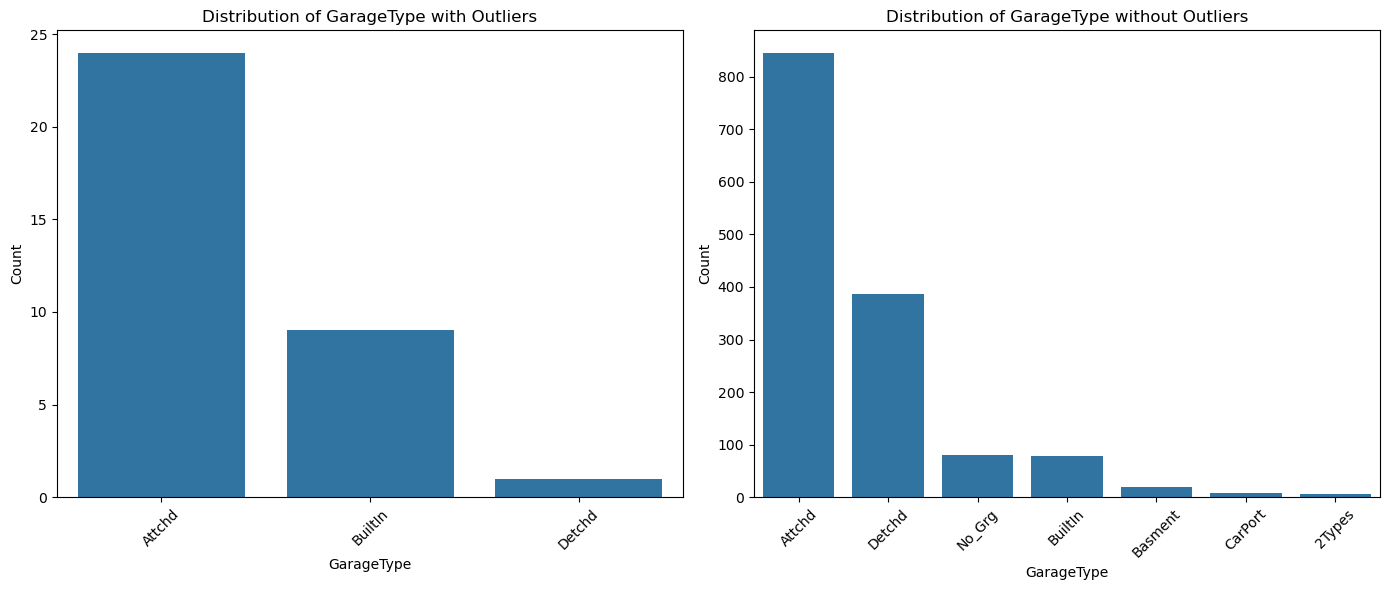

In [359]:
features = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
    'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrType',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','TotalBsmtSF', 'GrLivArea', 'OverallQual',
   'MasVnrType', 'GarageType']


# Define the SalePrice limit
sale_price_limit = 390000  # Any SalePrice above this is considered an outlier

# Function to visualize feature distributions before and after removing outliers
def plot_feature_distributions(feature):
    # Create DataFrames for outliers and no outliers based on SalePrice limit
    outliers_df = df[df['SalePrice'] > sale_price_limit]
    no_outliers_df = df[df['SalePrice'] <= sale_price_limit]

    # Plotting distributions
    plt.figure(figsize=(14, 6))

    # With Outliers
    plt.subplot(1, 2, 1)
    sns.countplot(data=outliers_df, x=feature, order=outliers_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} with Outliers')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Without Outliers
    plt.subplot(1, 2, 2)
    sns.countplot(data=no_outliers_df, x=feature, order=no_outliers_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature} without Outliers')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Visualize for each feature
for feature in features:
    plot_feature_distributions(feature)
